# Final Project MIS 665

## Chad Currier
On my honor, as a student, I have neither given nor received **unauthorized** aid on this **academic** work.

## *UPDATE* --  Final Project Begins in Section 6

### 1. Business Understanding:

The movie industry is a multi-billion dollar industry in the United States alone.  With a constant flood of scripts, movie ideas, remakes, and comic-book plots, it is obvious why predictive analytics is a critical piece to the understanding of what makes a successful, i.e. profitable movie.  

One of the biggest expenses for any movie is the advertising budget. Predictive analysis will allow advertising experts to selectivly spend money on the movies that could both benefit from the exposure and have the potential to be successful. 

Predictive analysis will assist in the development of a model that will assist production studios in the selection of scripts, directors, actresses and actors, and other aspects that are critical to the success of a film.  

The **goal** of this project is to develop analytics that will provide the level of detail necessary to acheive all of this.  Specifically we will try to achieve the following goals:

- **Understand** and **normalize** the data.  Taking into consideration that this data is from IMDB, an Internet website driven by fans, it is full of inaccuracies and missing values.  In order for the model to be successful this is a critical task.

- Build out the analytics or **"business intelligence"** and determine what are the important questions that need answered.  

- **Correlation**, we want to be able to answer with certainty what our answers are and not just assume that the data was correct.  This could be a very costly mistake, so providing a level of guarantee on our data is important.

-  **Tell the story**, this is the ultimate goal of this project.  The story will detail what makes a successful movie and our certainty that these findings are accurate.

In order for our project to be a success the collection and understanding of the the following **data points**(from the IMDB website) are **critical:**

- Movie Title

- Duration

- Director Name

- Actor Name

- Actor Facebook Likes
 
- Number of Users Leaving Reviews

- Critics Reviews

- Movie Facebook Likes

- Genre

- Content Rating

- Budget

- IMDB Score

As discussed previously in this report, **correlations** are **critical** to determining how accurate the analysis is.  The base of this study is going to be the IMDB Score in order to determine what the ticket buying audience is saying is successful.  The data that will need to be **correlated** with the IMDB Score is:

- Actor Name

- Director Name

- User Reviews

- Critic Reviews

- Content Rating

- Budget



### 2. Data understanding:

###### Loading Packages:

In [3]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### Connecting to Dataset:

In [4]:
# Getting data
df = pd.read_csv('popculture-imdb-5000-movie-dataset/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


###### Exploring Dataset:

In [5]:
# Basic Info
print df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
# Basic Stats
df.describe().head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5043.000000,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,83668.160817,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,138485.256806,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8593.500000,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000


In [7]:
# Null Data
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

###### As we can see with this information we have a significant amount of null values in our dataset.  

In [8]:
# find out data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [9]:
#Listing of columns to make answering questions easier
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [10]:
# Value Counts of imdb_score
df['imdb_score'].value_counts().head()

6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
Name: imdb_score, dtype: int64

In [11]:
#Determining Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

**Numerical columns**: num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, actor_2_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget, title_year, aspect_ratio, movie_facebook_likes

**Categorial columns**: color, director_name, actor_1_name, actor_2_name, actor_3_name, genres, movie_title, plot_keywords, movie_imdb_link, language, content_rating 

Most rows have **missing values**

**This dataset needs data cleaning & transformation**

### 3. Data Preparation:

In [12]:
# checking for and removing duplicates
df.drop_duplicates().head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [13]:
# Basic Statistics
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [14]:
# Dataframe information
df.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


##### Removing unnecessary columns: 
Color, Language, Country, IMDB Movie Link and Aspect Ratio are not relevant to our analysis and business case.  Movie success in my opinion is directly related to imdb_score, and none of these fields are relevant to a successful movie.

In [15]:
# Dropping unimportant columns
df = df.drop(['color','language','country','movie_imdb_link','aspect_ratio'], axis=1)
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [16]:
# Number of null values in each column
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [17]:
# Director name information
df['director_name'].describe()

count                 4939
unique                2398
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [18]:
#Further data cleaning
df['director_name'].describe()

count                 4939
unique                2398
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [19]:
# Gathering data on genres, looking at detail
df.groupby('genres').size().head()

genres
Action                                                             11
Action|Adventure                                                   11
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy              1
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     1
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               2
dtype: int64

###### After evaluating the genres column the data is essentially worthless due to the inefficients of labling movies in one or two genres, the data is too wide spread to be useful.  Dropping the column.

In [20]:
# Dropping Genre from our list
df_rev = df.drop(['genres'], axis=1)
df_rev.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0


In [21]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
num_user_for_reviews         5022 non-null float64
content_rating               4740 non-null object
budget                       4551 non

###### We need to determine the number of null values and make appropriate changes.

In [22]:
# Number of null values in each column
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

###### We will focus on the columns that have the ability to intelligently deal with null values.  

In [23]:
# Determining average value
df_rev['num_critic_for_reviews'].mean()

140.1942719807731

In [24]:
# Replacing null values in num_critic_for_reviews with the average value of this field.
df_rev = df_rev.fillna({'num_critic_for_reviews': 165})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [25]:
# Determining average value
df_rev['duration'].mean()

107.2010739856802

In [26]:
# Replacing null values in duration with the average value of this field.
df_rev = df_rev.fillna({'duration': 107})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [27]:
# Determining average value
df_rev['director_facebook_likes'].mean()

686.5092123911724

In [28]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'director_facebook_likes': 793})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [29]:
# Determining average value
df_rev['actor_3_facebook_likes'].mean()

645.0097609561753

In [30]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'actor_3_facebook_likes': 760})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [31]:
# Determining average value
df_rev['actor_1_facebook_likes'].mean()

6560.04706115965

In [32]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'actor_1_facebook_likes': 7501})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [33]:
# Determining average value
df_rev['actor_2_facebook_likes'].mean()

1651.7544731610337

In [34]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'actor_2_facebook_likes': 1994})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        884
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [35]:
# Determining average value
df_rev['gross'].mean()

48468407.52680933

In [36]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'gross': 51699457.31})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [37]:
# Determining average value
df_rev['facenumber_in_poster'].mean()

1.3711729622266402

In [38]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'facenumber_in_poster': 1})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
num_user_for_reviews          21
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [39]:
# Determining average value
df_rev['num_user_for_reviews'].mean()

272.77080844285143

In [40]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'num_user_for_reviews': 331})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
num_user_for_reviews           0
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [41]:
# Getting Content Rating values
df_rev.groupby('content_rating').size()

content_rating
Approved       55
G             112
GP              6
M               5
NC-17           7
Not Rated     116
PG            701
PG-13        1461
Passed          9
R            2118
TV-14          30
TV-G           10
TV-MA          20
TV-PG          13
TV-Y            1
TV-Y7           1
Unrated        62
X              13
dtype: int64

In [42]:
# R rating is the highest number, we will convert all null values to R
df_rev = df_rev.fillna({'content_rating': 'R'})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
num_user_for_reviews           0
content_rating                 0
budget                       492
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [43]:
# Determining average value
df_rev['budget'].mean()

39752620.436387606

In [44]:
# Replacing null values with the average value of this field.
df_rev = df_rev.fillna({'budget': 45493919.30})
df_rev.isnull().sum()

director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
num_user_for_reviews           0
content_rating                 0
budget                         0
title_year                   108
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [45]:
# Getting Content Rating values
df_rev.groupby('title_year').size().head()

title_year
1916.0    1
1920.0    1
1925.0    1
1927.0    1
1929.0    2
dtype: int64

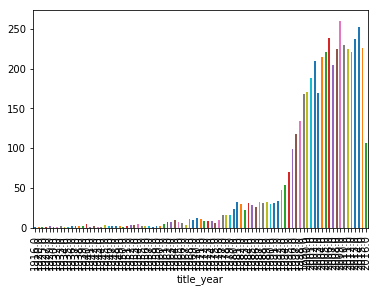

In [46]:
# Movies produced by year
df_rev.groupby('title_year').size().plot(kind='bar')

###### It is obvious that movie's produced have increased over the years, but there is no obvious year that had the most movies produced.  Having this value remain null will not damage our analysis, leaving these as null.

###### As we can see we need to get some of this data corrected.  GP and M is no longer used and should be G, X is no longer used and should be NC-17.

In [47]:
# Getting Content Rating values
df_rev.groupby('content_rating').size()

content_rating
Approved       55
G             112
GP              6
M               5
NC-17           7
Not Rated     116
PG            701
PG-13        1461
Passed          9
R            2421
TV-14          30
TV-G           10
TV-MA          20
TV-PG          13
TV-Y            1
TV-Y7           1
Unrated        62
X              13
dtype: int64

In [48]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'GP'}, {'content_rating': 'G'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [49]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'M'}, {'content_rating': 'G'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [50]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'X'}, {'content_rating': 'NC-17'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [51]:
# Getting Content Rating values
df_rev.groupby('content_rating').size()

content_rating
Approved       55
G             123
NC-17          20
Not Rated     116
PG            701
PG-13        1461
Passed          9
R            2421
TV-14          30
TV-G           10
TV-MA          20
TV-PG          13
TV-Y            1
TV-Y7           1
Unrated        62
dtype: int64

###### We have eliminated the old ratings, but now we need to do something with Approved, Not Rated, Passed, and Unrated
As we see in our groupby, R is the most common rating.  Therefore we will just move these values to an R rating.  

In [52]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'Approved'}, {'content_rating': 'R'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [53]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'Not Rated'}, {'content_rating': 'R'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [54]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'Approved'}, {'content_rating': 'R'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [55]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'Passed'}, {'content_rating': 'R'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [56]:
# Transforming data
df_rev = df_rev.replace({'content_rating': 'Unrated'}, {'content_rating': 'R'})
df_rev.head(1)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000


In [57]:
# Getting Content Rating values
df_rev.groupby('content_rating').size()

content_rating
G         123
NC-17      20
PG        701
PG-13    1461
R        2663
TV-14      30
TV-G       10
TV-MA      20
TV-PG      13
TV-Y        1
TV-Y7       1
dtype: int64

###### This now makes sense with the ratings we see in movies today

###### We have profit and budget data, so it makes sense to create new rows based on this data 
** Source: http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html#data-cleaning

###### Two columns will be added:  Profit and Return on Investment.  Two numbers all companies like to see!!

In [58]:
# Calculating Profit -- Creating Column
df_rev['profit'] = df_rev["gross"] - df_rev["budget"].astype(float)
df_rev.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,Avatar,...,0.0,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000,5.235058e+08
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,...,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,0,9.404152e+06
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,Spectre,...,1.0,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,85000,-4.492582e+07
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Tom Hardy,The Dark Knight Rises,...,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1.981306e+08
4,Doug Walker,165.0,107.0,131.0,760.0,Rob Walker,131.0,5.169946e+07,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,0.0,NaN,331.0,R,45493919.3,NaN,12.0,7.1,0,6.205538e+06


In [59]:
# Calculating ROI -- Creating Column
df_rev['roi'] = ((df_rev["gross"] / df_rev["budget"]) * 100)
df_rev.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,Avatar,...,avatar|future|marine|native|paraplegic,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,33000,5.235058e+08,320.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,0,9.404152e+06,103.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,Spectre,...,bomb|espionage|sequel|spy|terrorist,994.0,PG-13,245000000.0,2015.0,393.0,6.8,85000,-4.492582e+07,81.662929
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Tom Hardy,The Dark Knight Rises,...,deception|imprisonment|lawlessness|police offi...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,164000,1.981306e+08,179.252257
4,Doug Walker,165.0,107.0,131.0,760.0,Rob Walker,131.0,5.169946e+07,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,NaN,331.0,R,45493919.3,NaN,12.0,7.1,0,6.205538e+06,113.640368


###### At this point I believe we have fairly clean and important data.  Time to move onto analysis.

### 4. Business Intelligence:

###### A boxplot is a good way to look for anything interesing or any outliers.  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text xticklabel objects>)

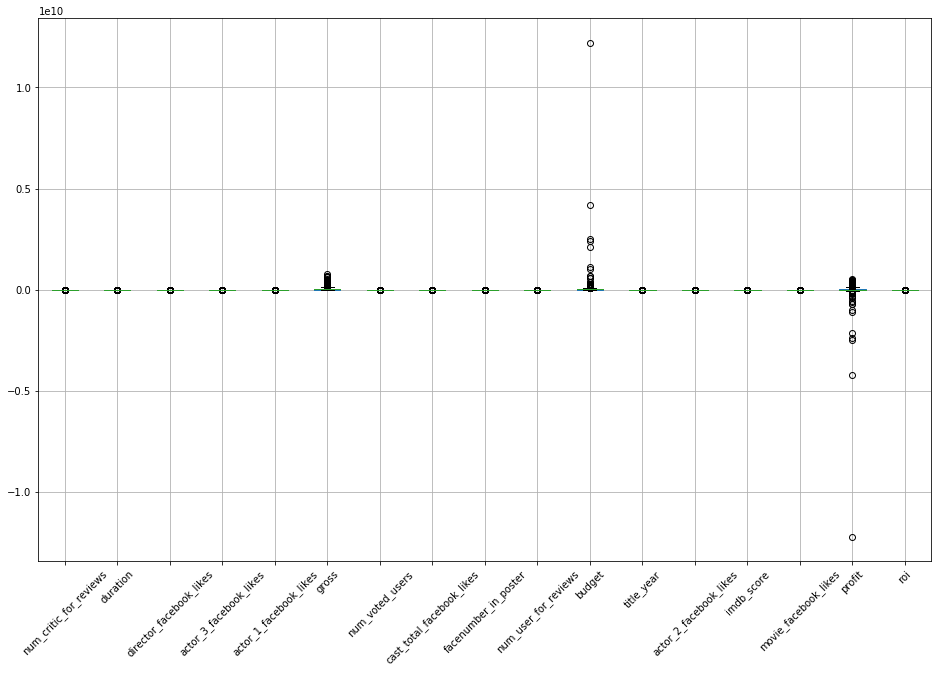

In [60]:
# Box Plot to look for anything interesting
plt.figure(figsize=(16,10))
df_rev.boxplot()
plt.xticks(rotation=45)

###### We see two interesting outliers on budget and profit.  

In [61]:
# Telling pandas to change the numbers to a readable format
pd.options.display.float_format = '{:.2f}'.format

In [62]:
# sort values by profit column
df_rev.sort_values('profit', ascending=False).head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,CCH Pounder,Avatar,...,avatar|future|marine|native|paraplegic,3054.00,PG-13,237000000.00,2009.00,936.00,7.90,33000,523505847.00,320.89
29,Colin Trevorrow,644.00,124.00,365.00,1000.00,Judy Greer,3000.00,652177271.00,Bryce Dallas Howard,Jurassic World,...,dinosaur|disaster film|experiment gone wrong|j...,1290.00,PG-13,150000000.00,2015.00,2000.00,7.00,150000,502177271.00,434.78
26,James Cameron,315.00,194.00,0.00,794.00,Kate Winslet,29000.00,658672302.00,Leonardo DiCaprio,Titanic,...,artist|love|ship|titanic|wet,2528.00,PG-13,200000000.00,1997.00,14000.00,7.70,26000,458672302.00,329.34
3024,George Lucas,282.00,125.00,0.00,504.00,Peter Cushing,11000.00,460935665.00,Harrison Ford,Star Wars: Episode IV - A New Hope,...,death star|empire|galactic war|princess|rebellion,1470.00,PG,11000000.00,1977.00,1000.00,8.70,33000,449935665.00,4190.32
3080,Steven Spielberg,215.00,120.00,14000.00,548.00,Dee Wallace,861.00,434949459.00,Henry Thomas,E.T. the Extra-Terrestrial,...,bicyclist|boy|doll|star wars reference|voice i...,515.00,PG,10500000.00,1982.00,725.00,7.90,34000,424449459.00,4142.38
794,Joss Whedon,703.00,173.00,0.00,19000.00,Robert Downey Jr.,26000.00,623279547.00,Chris Hemsworth,The Avengers,...,alien invasion|assassin|battle|iron man|soldier,1722.00,PG-13,220000000.00,2012.00,21000.00,8.10,123000,403279547.00,283.31
17,Joss Whedon,703.00,173.00,0.00,19000.00,Robert Downey Jr.,26000.00,623279547.00,Chris Hemsworth,The Avengers,...,alien invasion|assassin|battle|iron man|soldier,1722.00,PG-13,220000000.00,2012.00,21000.00,8.10,123000,403279547.00,283.31
509,Roger Allers,186.00,73.00,28.00,847.00,Nathan Lane,2000.00,422783777.00,Matthew Broderick,The Lion King,...,king|prince|scar|uncle|unnecessary guilt,656.00,G,45000000.00,1994.00,886.00,8.50,17000,377783777.00,939.52
240,George Lucas,320.00,136.00,0.00,1000.00,Liam Neeson,20000.00,474544677.00,Natalie Portman,Star Wars: Episode I - The Phantom Menace,...,alien|character says i have a bad feeling abou...,3597.00,PG,115000000.00,1999.00,14000.00,6.50,13000,359544677.00,412.65
66,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,Christian Bale,The Dark Knight,...,based on comic book|dc comics|psychopath|star ...,4667.00,PG-13,185000000.00,2008.00,13000.00,9.00,37000,348316061.00,288.28


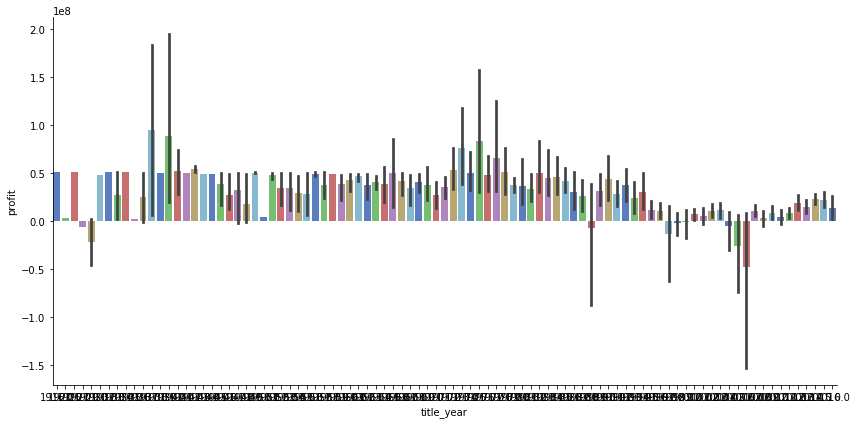

In [63]:
# Charting profit by title year
sns.factorplot("title_year", "profit", data=df_rev, kind="bar", 
               size=6, aspect=2, palette="muted")

In [64]:
# sort values by roi column
df_rev.sort_values('roi', ascending=False).head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi
5040,Benjamin Roberds,13.00,76.00,0.00,0.00,Maxwell Moody,0.00,51699457.31,Eva Boehnke,A Plague So Pleasant,...,NaN,3.00,R,1400.00,2013.00,0.00,6.30,16,51698057.31,3692818.38
5036,Anthony Vallone,165.00,84.00,2.00,2.00,John Considine,45.00,51699457.31,Richard Jewell,The Mongol King,...,jewell|mongol|nostradamus|stepnicka|vallone,1.00,PG-13,3250.00,2005.00,44.00,7.80,4,51696207.31,1590752.53
4793,Oren Peli,409.00,84.00,110.00,21.00,Ashley Palmer,189.00,107917283.00,Micah Sloat,Paranormal Activity,...,dark force|entity|evil force|found footage|par...,1189.00,R,15000.00,2007.00,109.00,6.30,12000,107902283.00,719448.55
5028,Ivan Kavanagh,12.00,83.00,18.00,0.00,Michael Parle,10.00,51699457.31,Patrick O'Donnell,Tin Can Man,...,NaN,1.00,R,10000.00,2007.00,5.00,6.70,105,51689457.31,516994.57
2345,Jane Clark,165.00,7.00,23.00,51.00,Traci Dinwiddie,344.00,51699457.31,Necar Zadegan,The Touch,...,lesbian|paris france|period piece|poem|poetess,331.00,R,13000.00,2007.00,281.00,5.20,30,51686457.31,397688.13
5022,Jim Chuchu,6.00,60.00,0.00,4.00,Olwenya Maina,147.00,51699457.31,Paul Ogola,Stories of Our Lives,...,NaN,1.00,R,15000.00,2014.00,19.00,7.40,45,51684457.31,344663.05
5020,Brandon Landers,165.00,143.00,8.00,8.00,Alana Kaniewski,720.00,51699457.31,Robbie Barnes,The Ridges,...,avatar|college|death|tron|university,8.00,R,17350.00,2011.00,19.00,3.00,33,51682107.31,297979.58
4799,Jonathan Caouette,72.00,88.00,20.00,0.00,Jonathan Caouette,58.00,592014.00,Greg Ayres,Tarnation,...,answering machine|home movie|lithium|schizophr...,114.00,R,218.00,2003.00,20.00,7.20,754,591796.00,271566.06
5024,Jason Trost,42.00,78.00,91.00,86.00,Jason Trost,407.00,51699457.31,Sean Whalen,All Superheroes Must Die,...,arch villain|game of death|kidnapping|superhero,35.00,R,20000.00,2011.00,91.00,4.00,835,51679457.31,258497.29
4963,Stephen Langford,2.00,82.00,7.00,50.00,Gabriela Castillo,143.00,51699457.31,Kevin P. Farley,"Dude, Where's My Dog?!",...,NaN,4.00,PG,20000.00,2014.00,134.00,3.20,178,51679457.31,258497.29


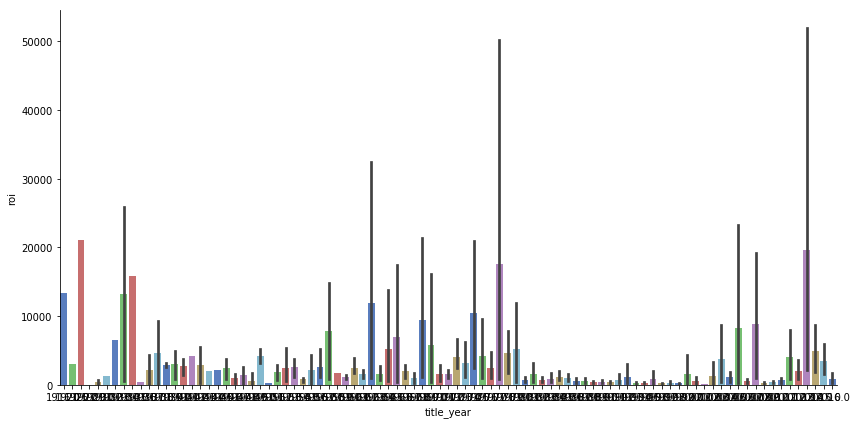

In [65]:
# charting roi by title year
sns.factorplot("title_year", "roi", data=df_rev, kind="bar", 
               size=6, aspect=2, palette="muted")

In [66]:
# sort values by IMDB rating, looking at top 100 movies
df_rev.sort_values('imdb_score', ascending=False).head(100)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi
2765,John Blanchard,165.00,65.00,0.00,176.00,Andrea Martin,770.00,51699457.31,Martin Short,Towering Inferno,...,NaN,331.00,R,45493919.30,nan,179.00,9.50,0,6205538.01,113.64
1937,Frank Darabont,199.00,142.00,0.00,461.00,Jeffrey DeMunn,11000.00,28341469.00,Morgan Freeman,The Shawshank Redemption,...,escape from prison|first person narration|pris...,4144.00,R,25000000.00,1994.00,745.00,9.30,108000,3341469.00,113.37
3466,Francis Ford Coppola,208.00,175.00,0.00,3000.00,Marlon Brando,14000.00,134821952.00,Al Pacino,The Godfather,...,crime family|mafia|organized crime|patriarch|r...,2238.00,R,6000000.00,1972.00,10000.00,9.20,43000,128821952.00,2247.03
4409,John Stockwell,2.00,90.00,134.00,354.00,T.J. Storm,260000.00,51699457.31,Matthew Ziff,Kickboxer: Vengeance,...,NaN,1.00,R,17000000.00,2016.00,454.00,9.10,0,34699457.31,304.11
2824,NaN,53.00,55.00,793.00,2.00,Olaf Lubaszenko,20.00,447093.00,Krystyna Janda,Dekalog,...,meaning of life|moral challenge|morality|searc...,37.00,TV-MA,45493919.30,nan,3.00,9.10,0,-45046826.30,0.98
3207,NaN,53.00,55.00,793.00,2.00,Olaf Lubaszenko,20.00,447093.00,Krystyna Janda,Dekalog,...,meaning of life|moral challenge|morality|searc...,37.00,TV-MA,45493919.30,nan,3.00,9.10,0,-45046826.30,0.98
66,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,Christian Bale,The Dark Knight,...,based on comic book|dc comics|psychopath|star ...,4667.00,PG-13,185000000.00,2008.00,13000.00,9.00,37000,348316061.00,288.28
2837,Francis Ford Coppola,149.00,220.00,0.00,3000.00,Al Pacino,22000.00,57300000.00,Robert De Niro,The Godfather: Part II,...,1950s|corrupt politician|lake tahoe nevada|mel...,650.00,R,13000000.00,1974.00,14000.00,9.00,14000,44300000.00,440.77
3481,NaN,54.00,53.00,793.00,1000.00,Adam Goldberg,4000.00,51699457.31,Kirsten Dunst,Fargo,...,anthology|death|insurance salesman|minnesota|p...,173.00,TV-MA,45493919.30,nan,1000.00,9.00,61000,6205538.01,113.64
339,Peter Jackson,328.00,192.00,0.00,416.00,Billy Boyd,5000.00,377019252.00,Orlando Bloom,The Lord of the Rings: The Return of the King,...,battle|epic|king|orc|ring,3189.00,PG-13,94000000.00,2003.00,857.00,8.90,16000,283019252.00,401.08


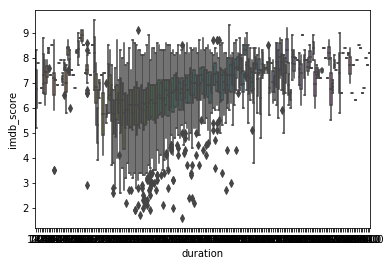

In [67]:
#Boxplot to look at the relationship between duration and imdb_score
sns.boxplot(df_rev.duration, df_rev.imdb_score)

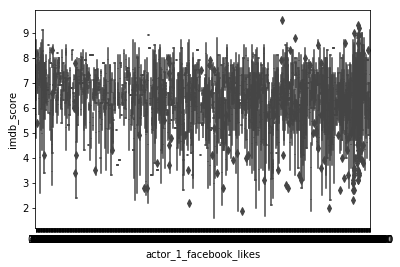

In [68]:
#Boxplot to look at the relationship between actor_3_facebook_likes and imdb_score
sns.boxplot(df_rev.actor_1_facebook_likes, df_rev.imdb_score)

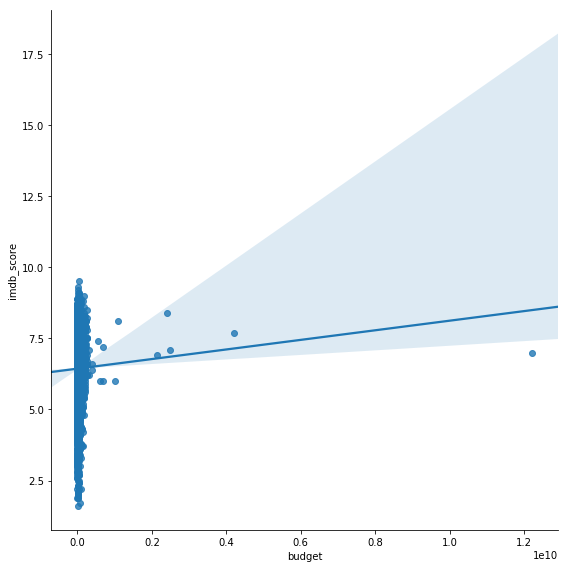

In [69]:
# lmplot IMDB Score and ROI
sns.lmplot("budget", "imdb_score", df_rev, x_jitter=.15, size=8)

There is not a strong correlation between a high imdb score and budget

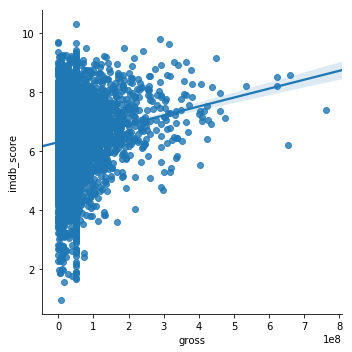

In [70]:
# lmplot Profit and IMDB Score
sns.lmplot("gross", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

We see a moderate correlation between the gross sales and the imdb score. If gross sales are higher we see a slightly higher imdb score

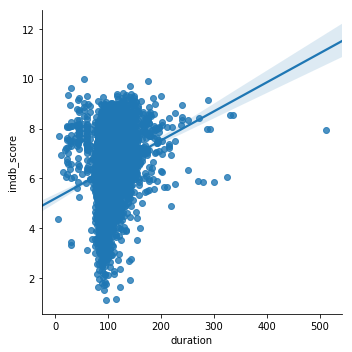

In [71]:
# lmplot Duration and IMDB Score
sns.lmplot("duration", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

This is a strong correlation.  The longer the movie, the higher the imdb score.

In [72]:
# Columns Refresh
list(df_rev)

['director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'num_user_for_reviews',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'profit',
 'roi']

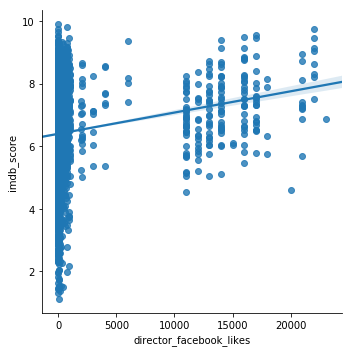

In [73]:
# lmplot director_facebook_likes and IMDB Score
sns.lmplot("director_facebook_likes", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

Director Facebook likes has a slight effect on a stronger imdb score.

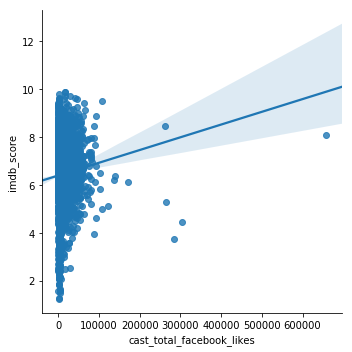

In [74]:
# lmplot cast_total_facebook_likes and IMDB Score
sns.lmplot("cast_total_facebook_likes", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

This shows that the more facebook likes the cast has, the stronger the imdb score.

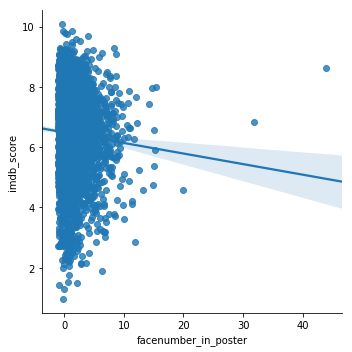

In [75]:
# lmplot facenumber_in_poster and IMDB Score
sns.lmplot("facenumber_in_poster", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

This is interesting, the more faces in a movie poster, the lower the imdb score.

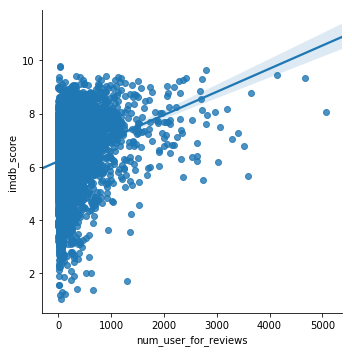

In [76]:
# lmplot num_user_for_reviews and IMDB Score
sns.lmplot("num_user_for_reviews", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

This is another strong correlation, the more users that submit a review, the higher imdb scores we see.

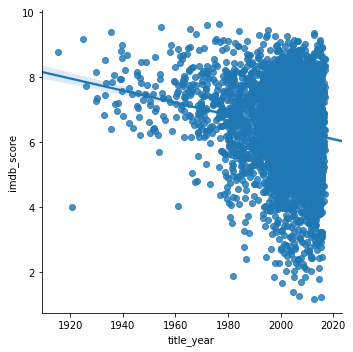

In [77]:
# lmplot title year and IMDB Score
sns.lmplot("title_year", "imdb_score", df_rev, y_jitter=1.0, x_jitter=1.0)

Newer movies do not have a higher IMDB Score.  I have long thought that movie quality has been going downhill and this correlation supports my thoughts.  

###### Looking at different visualizations to look for validation of the trends that are being indicated in our data.  Interesting findings will be disclosed.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


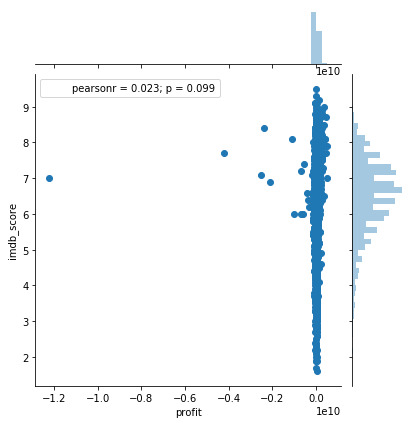

In [78]:
# Looking at a JointPlot
sns.jointplot("profit", "imdb_score", df_rev)

This is a telling chart.  We can see that not many movies get a high IMDB Score, further analysis will allow us to determin the profitability based upon IMDB Score.  

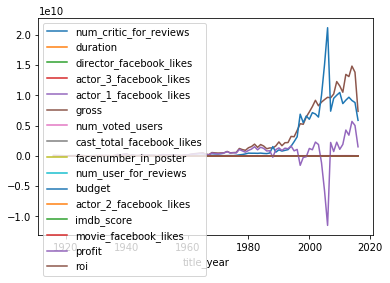

In [79]:
# Plot looking at all of our data by title_year
df_rev.groupby('title_year').sum().plot()

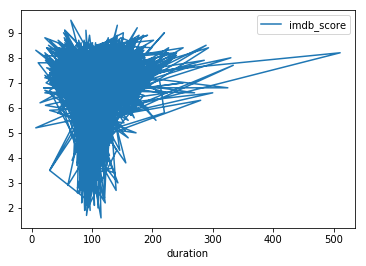

In [80]:
# Rev Plot
df_rev.plot('duration', 'imdb_score')

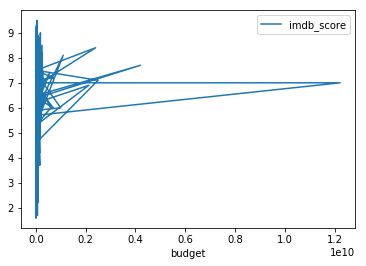

In [81]:
# Rev Plot
df_rev.plot('budget', 'imdb_score')


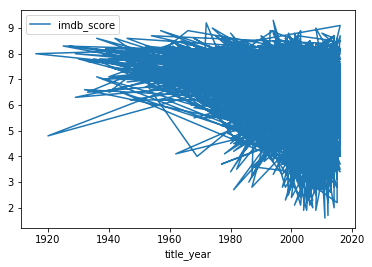

In [82]:
# Rev Plot
df_rev.plot('title_year', 'imdb_score')

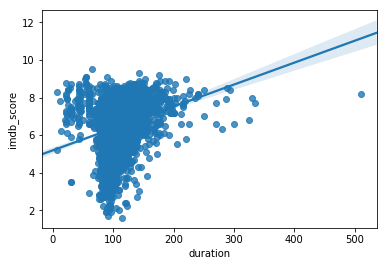

In [83]:
# RegPlot
sns.regplot(df_rev.duration, df_rev.imdb_score)

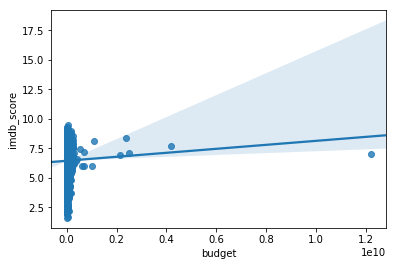

In [84]:
# RegPlot
sns.regplot(df_rev.budget, df_rev.imdb_score)


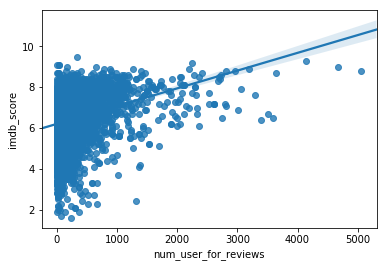

In [85]:
# RegPlot
sns.regplot(df_rev.num_user_for_reviews, df_rev.imdb_score)

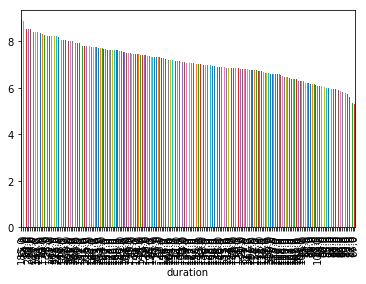

In [86]:
df_rev.groupby('duration')['imdb_score'].mean().sort_values(ascending=False).plot(kind='bar')

While difficult to read this chart shows something very interesting.  It shows that there is a direct relationship between how successful a movie is based on duration, the longer the movie the higher the rating on IMDB.

#### Correlations to gain additional insight

In [87]:
corr = pd.DataFrame(df_rev.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.41
num_critic_for_reviews,0.30
num_user_for_reviews,0.29
duration,0.26
movie_facebook_likes,0.25
director_facebook_likes,0.17
gross,0.17
cast_total_facebook_likes,0.09
actor_2_facebook_likes,0.08
actor_1_facebook_likes,0.08


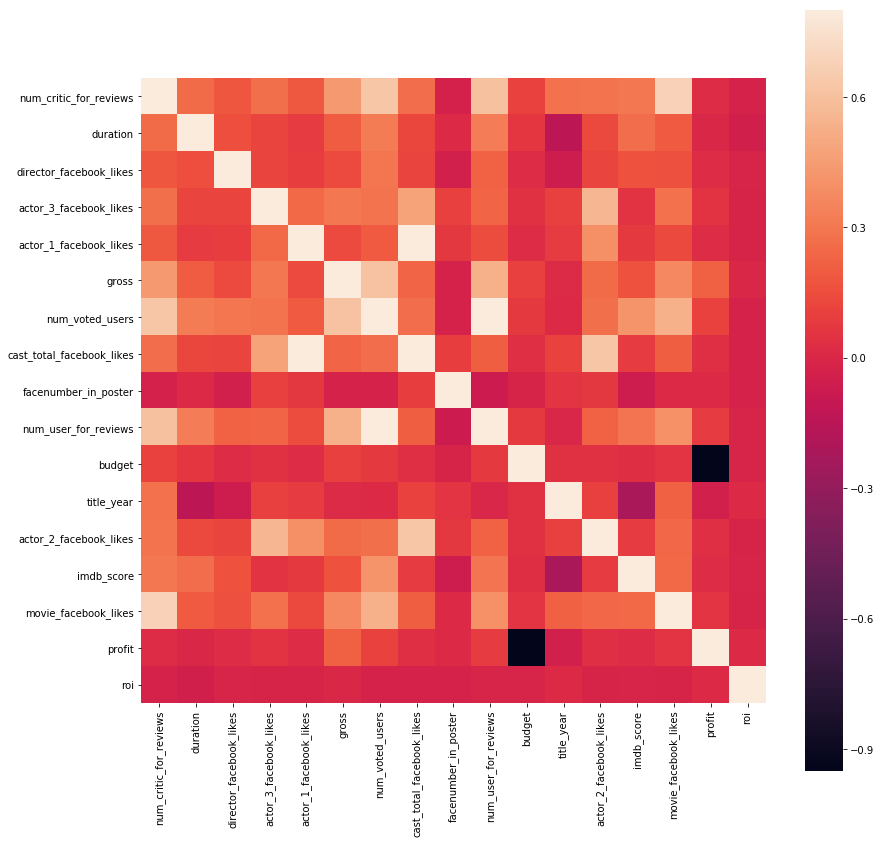

In [88]:
# Heatmap
plt.figure(figsize=(14,14))
sns.heatmap(df_rev.corr(),vmax=.8, square=True)

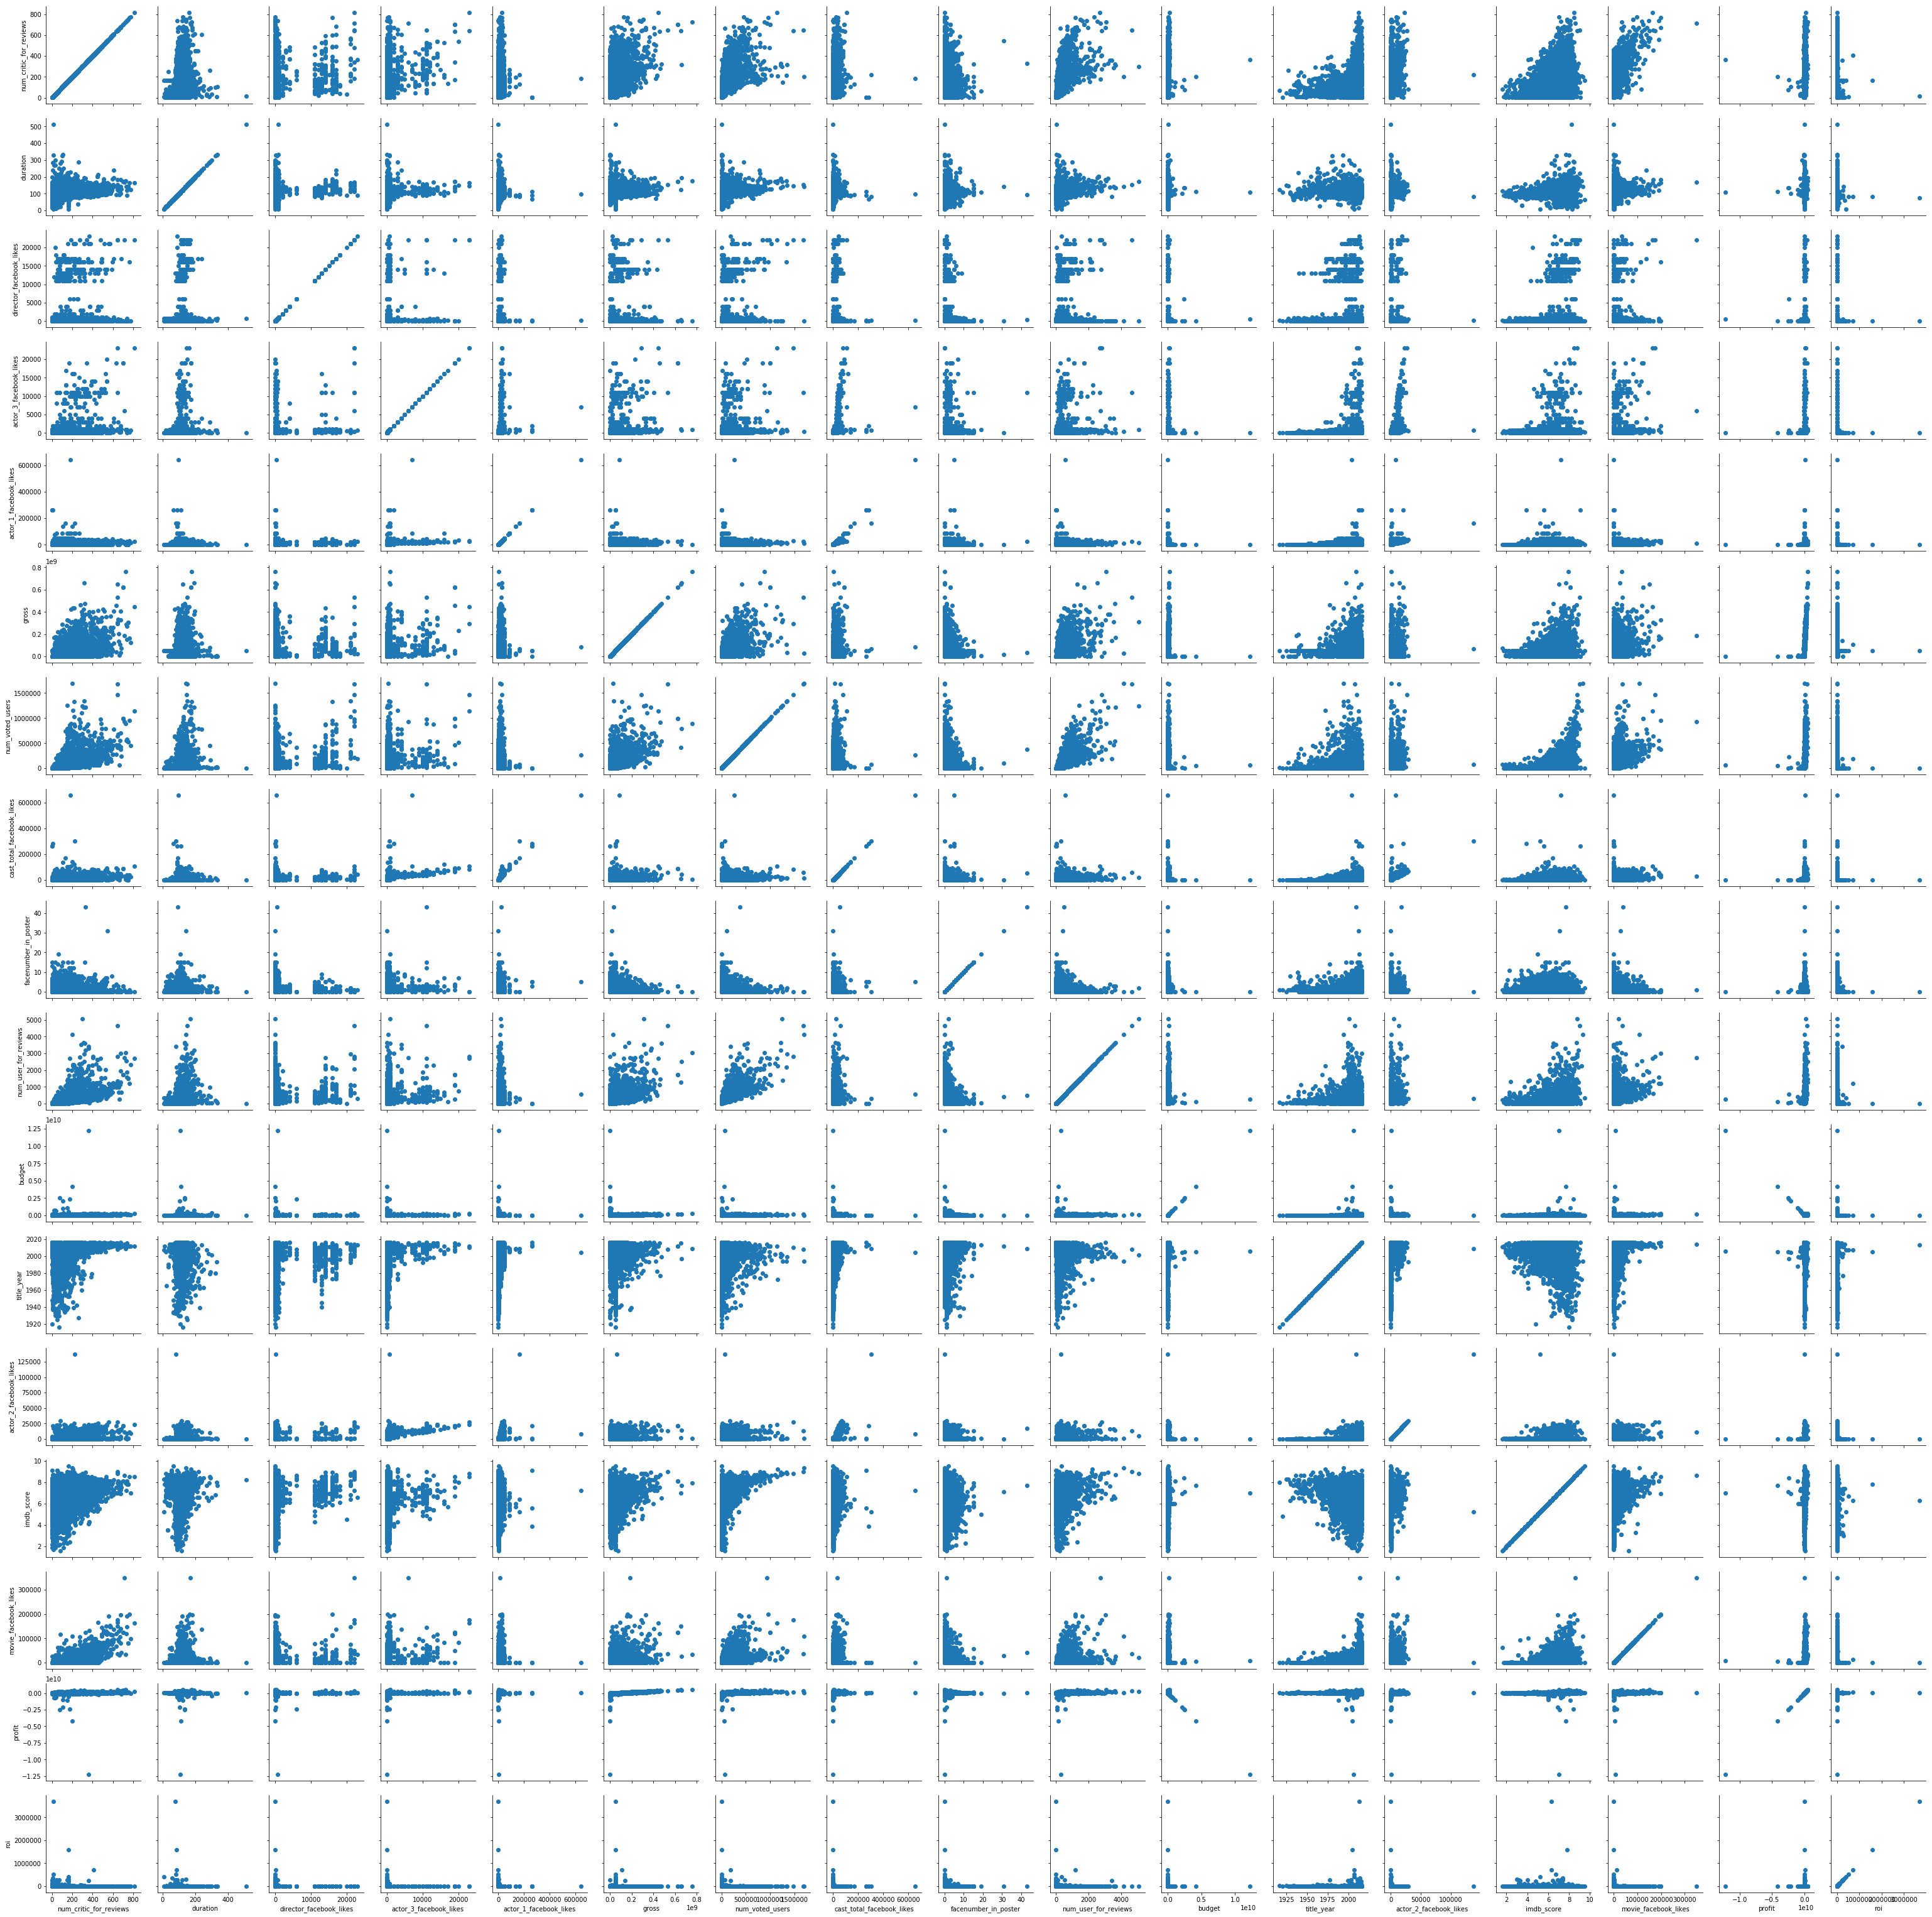

In [89]:
# plot PairGrid
g = sns.PairGrid(df_rev)
g.map(plt.scatter)

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


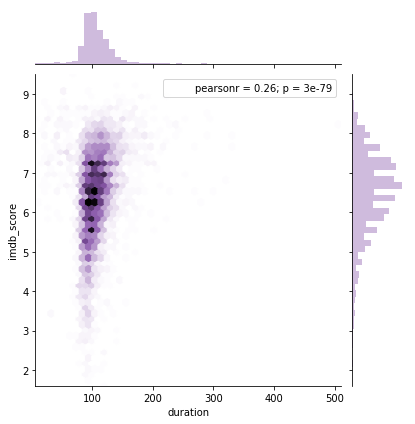

In [90]:
# jointplott for duration and imdb score
sns.jointplot("duration", "imdb_score", df_rev, kind="hex", color="#8855AA")

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


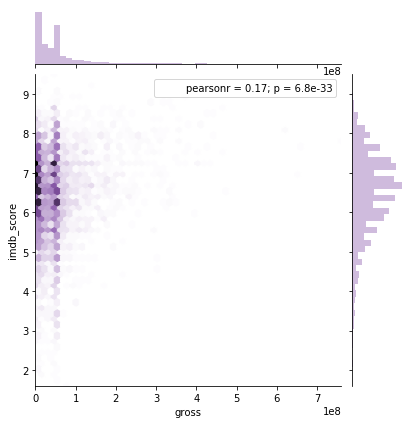

In [91]:
# jointplott for gross and imdb score
sns.jointplot("gross", "imdb_score", df_rev, kind="hex", color="#8855AA")

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


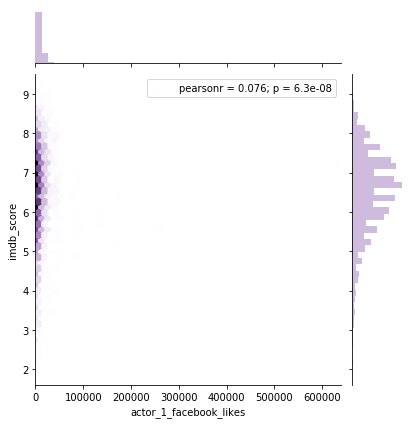

In [92]:
# jointplott for actor_1_facebook_likes and imdb score
sns.jointplot("actor_1_facebook_likes", "imdb_score", df_rev, kind="hex", color="#8855AA")

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


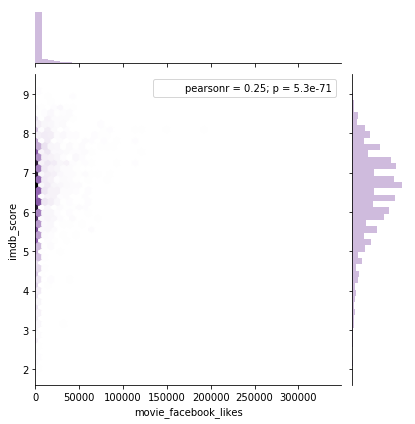

In [93]:
# jointplott for movie_facebook_likes and imdb score
sns.jointplot("movie_facebook_likes", "imdb_score", df_rev, kind="hex", color="#8855AA")

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.00401609, 0.00953822, 0.0256026 , 0.05572331, 0.14533242,
        0.29066484, 0.38027395, 0.27234141, 0.07705881, 0.00527112]),
 array([1.6 , 2.39, 3.18, 3.97, 4.76, 5.55, 6.34, 7.13, 7.92, 8.71, 9.5 ]),
 <a list of 10 Patch objects>)

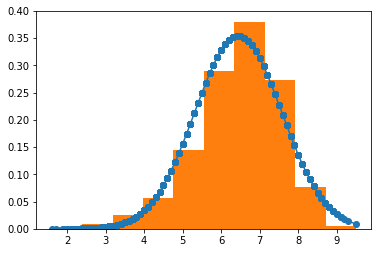

In [94]:
# Testing for normalization
h = sorted(df_rev['imdb_score'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,normed=True) 

As we see with the chart above, imdb_score data is **normalized**.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([3.14753438e-04, 1.13704679e-02, 7.59342669e-03, 4.48523649e-04,
        7.08195235e-05, 2.75409258e-05, 1.18032539e-05, 0.00000000e+00,
        0.00000000e+00, 3.93441797e-06]),
 array([  7. ,  57.4, 107.8, 158.2, 208.6, 259. , 309.4, 359.8, 410.2,
        460.6, 511. ]),
 <a list of 10 Patch objects>)

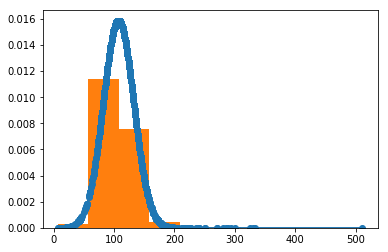

In [95]:
# Testing for normalization
h = sorted(df_rev['duration'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,normed=True) 

As we see with the chart above, duration data is **normalized**.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([1.55723280e-05, 2.78851874e-08, 1.23934166e-08, 0.00000000e+00,
        9.29506246e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.09835415e-09]),
 array([     0.,  64000., 128000., 192000., 256000., 320000., 384000.,
        448000., 512000., 576000., 640000.]),
 <a list of 10 Patch objects>)

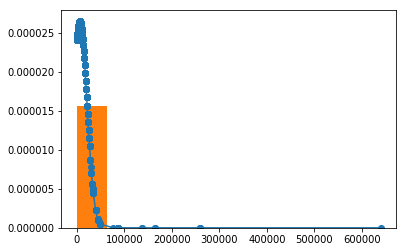

In [96]:
# Testing for normalization
h = sorted(df_rev['actor_1_facebook_likes'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,normed=True) 

As we see with the chart above, actor_1_facebook_likes data is **NOT normalized**.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([8.17820429e-10, 3.24660750e-13, 1.62330375e-13, 1.62330375e-13,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.62330375e-13]),
 array([2.18000000e+02, 1.22155020e+09, 2.44310017e+09, 3.66465015e+09,
        4.88620013e+09, 6.10775011e+09, 7.32930009e+09, 8.55085007e+09,
        9.77240004e+09, 1.09939500e+10, 1.22155000e+10]),
 <a list of 10 Patch objects>)

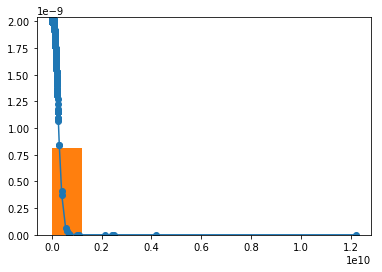

In [97]:
# Testing for normalization
h = sorted(df_rev['budget'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,normed=True) 

As we see with the chart above, budget data is **NOT normalized**.

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([2.67726208e-05, 1.30681298e-06, 3.23862348e-07, 1.53408481e-07,
        6.24997514e-08, 2.84089779e-08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.68179558e-09]),
 array([     0.,  34900.,  69800., 104700., 139600., 174500., 209400.,
        244300., 279200., 314100., 349000.]),
 <a list of 10 Patch objects>)

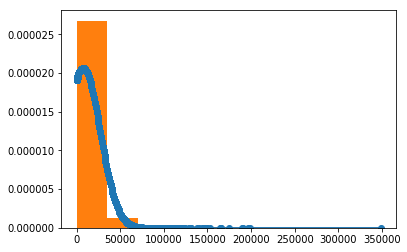

In [98]:
# Testing for normalization
h = sorted(df_rev['movie_facebook_likes'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
plt.plot(h,fit,'-o')
plt.hist(h,normed=True) 

As we see with the chart above, movie_facebook_likes data is **NOT normalized**.

In [99]:
# Columns Refresh
list(df_rev)

['director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'num_user_for_reviews',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'movie_facebook_likes',
 'profit',
 'roi']

### 5.  Correlation Analysis -- Verifying our Findings

In [100]:
# find out correlation of two columns: actor_1_facebook_likes, IMDB Score
df_rev[['actor_1_facebook_likes','imdb_score']].corr()

,actor_1_facebook_likes,imdb_score
actor_1_facebook_likes,1.00,0.08
imdb_score,0.08,1.00


In [101]:
# find out correlation of two columns: movie_facebook_likes, IMDB Score
df_rev[['movie_facebook_likes','imdb_score']].corr()

,movie_facebook_likes,imdb_score
movie_facebook_likes,1.00,0.25
imdb_score,0.25,1.00


In [102]:
# find out correlation of two columns: Gross, IMDB Score
df_rev[['gross','imdb_score']].corr()

,gross,imdb_score
gross,1.00,0.17
imdb_score,0.17,1.00


In [103]:
# find out correlation of two columns: Duration, IMDB Score
df_rev[['duration','imdb_score']].corr()

,duration,imdb_score
duration,1.00,0.26
imdb_score,0.26,1.00


###### Is there a statistical difference between duration and imdb score

Null Hyptothesis is that there is no correlation between duration and getting a high imdb score.

In [104]:
# testing null hypothesis
duration = stats.normaltest(df_rev['duration'])
imdb_score = stats.normaltest(df_rev['imdb_score'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % duration
print "The chi-square statistic is %.3f and the p-value is %.3f." % imdb_score

The chi-square statistic is 3080.332 and the p-value is 0.000.
The chi-square statistic is 463.280 and the p-value is 0.000.


We can reject our null hypothesis and conclude that there **IS** a correlation.

Null Hyptothesis is that there is no correlation between director_facebook_likes and getting a high imdb score.

In [105]:
# testing null hypothesis
director_facebook_likes = stats.normaltest(df_rev['director_facebook_likes'])
imdb_score = stats.normaltest(df_rev['imdb_score'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % director_facebook_likes
print "The chi-square statistic is %.3f and the p-value is %.3f." % imdb_score

The chi-square statistic is 5118.646 and the p-value is 0.000.
The chi-square statistic is 463.280 and the p-value is 0.000.


We can reject our null hypothesis and conclude that there **IS** a correlation.

Null Hyptothesis is that there is no correlation between num_critic_for_reviews and getting a high imdb score.

In [106]:
# testing null hypothesis
num_critic_for_reviews = stats.normaltest(df_rev['num_critic_for_reviews'])
imdb_score = stats.normaltest(df_rev['imdb_score'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % num_critic_for_reviews
print "The chi-square statistic is %.3f and the p-value is %.3f." % imdb_score

The chi-square statistic is 1423.470 and the p-value is 0.000.
The chi-square statistic is 463.280 and the p-value is 0.000.


We can reject our null hypothesis and conclude that there **IS** a correlation.

Null Hyptothesis is that there is no correlation between budget and getting a high imdb score.

In [107]:
# testing null hypothesis
budget = stats.normaltest(df_rev['budget'])
imdb_score = stats.normaltest(df_rev['imdb_score'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % budget
print "The chi-square statistic is %.3f and the p-value is %.3f." % imdb_score

The chi-square statistic is 16023.301 and the p-value is 0.000.
The chi-square statistic is 463.280 and the p-value is 0.000.


We can reject our null hypothesis and conclude that there **IS** a correlation.

Null Hyptothesis is that there is no correlation between facenumber_in_poster and getting a high imdb score.

In [108]:
# testing null hypothesis
facenumber_in_poster = stats.normaltest(df_rev['facenumber_in_poster'])
imdb_score = stats.normaltest(df_rev['imdb_score'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % facenumber_in_poster
print "The chi-square statistic is %.3f and the p-value is %.3f." % imdb_score



The chi-square statistic is 4911.845 and the p-value is 0.000.
The chi-square statistic is 463.280 and the p-value is 0.000.


We can reject our null hypothesis and conclude that there **IS** a correlation.

In [109]:
corr = pd.DataFrame(df_rev.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.41
num_critic_for_reviews,0.30
num_user_for_reviews,0.29
duration,0.26
movie_facebook_likes,0.25
director_facebook_likes,0.17
gross,0.17
cast_total_facebook_likes,0.09
actor_2_facebook_likes,0.08
actor_1_facebook_likes,0.08


### Storytelling:  Our Findings:

###### Our analysis has drive us to make some conclusions about what makes a movie successful in regards to the IMDB Movie Score.  Some of them were expected, but there were also some that were surprising or at a minimum entertaining. 

**Successful Movie Trends**

- The more users that vote for a movie on the IMDB Website the better score we see.  This was the strongest correlation discovered, potential avenue to take advantage of this: Targeted advertising to get people to the theater and to leave a rating on IMDB.

- The more critics that review the movie on the IMDB Website also supports an upward trend on movie score.  In order to take advantage of that particular trend, care should be taken to invite critics to a movie review that are active on IMDB.

- The more users that review the movie on the IMDB Website also supports an upward trend on movie score. In order to help a movie score advertising should target getting people to leave a review.  Possibly some kind of drawing or give away to those that leave a review?

- Surprsingly movie duration **positively** impacts a movie score on IMDB.  Perhaps people feel they get more for their money?  This might  not be a trend that the movie industry can take direct advantage of, but it is interesting. 

- Facebook is critical to a successful movie.  All statistics in regards to Facebook likes show that the more likes, the higher the IMDB Score.  Potential ways to take advantage of this trend is to write in social media clauses into contracts with all Cast Members, and the Director of the movie.  

- Gross sales is also important as we see a correlation with the most gross sales a movie has, the more positive the IMDB Score.  This makes sense, and is not something that the movie industry can really capitalize on.  Good movies are talked about and that drives more people to the theater, cause and effect.  

**Trends that have a negative impact on IMDB Score**

- Interestingly a big budget does not necessarily indicate a successful movie score.

- Profit also does not indicate a successful movie score.  

- Maybe the most interesting finding in the data is the trends we saw with the number of faces in the movie poster.  There was a very strong correlation that showed the more faces that were on a poster, the worse the score was on IMDB Website.  Maybe movie advertisers should focus on the posters or ads and only include **One** face.

###### For fun and because I enjoy WordClouds:

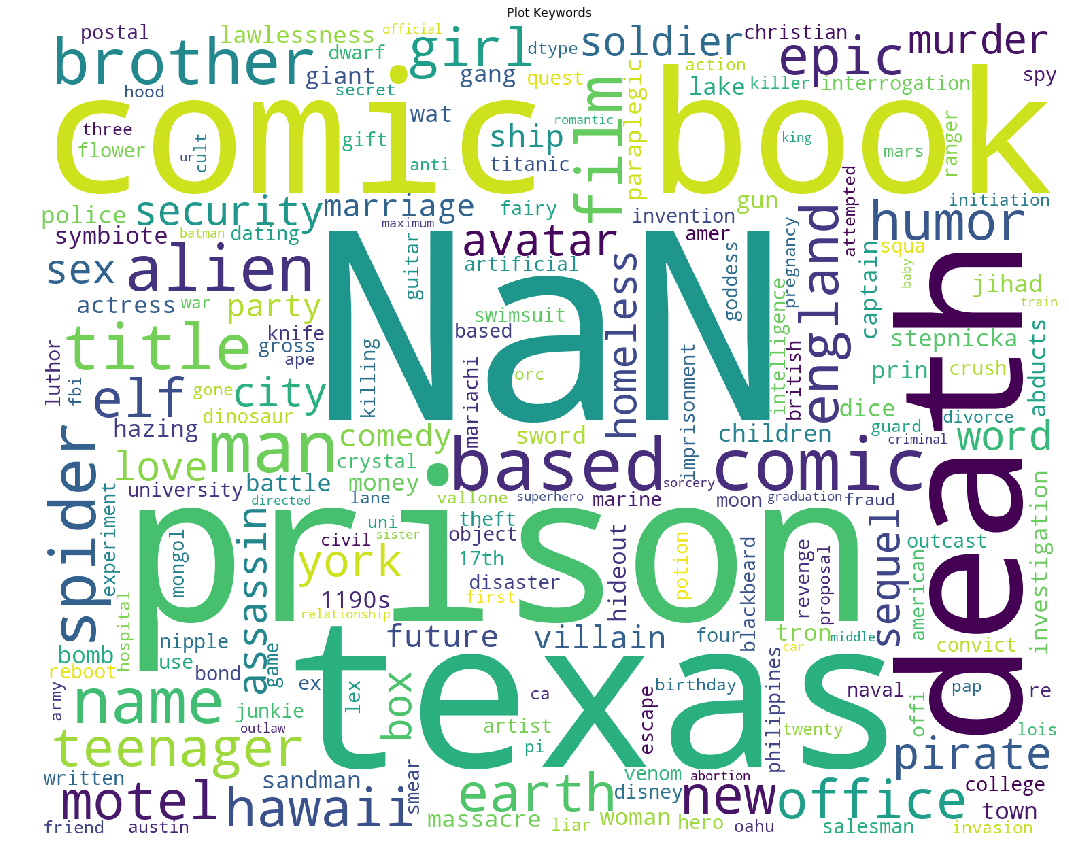

In [110]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(df_rev['plot_keywords']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Plot Keywords')
plt.axis('off')
plt.show()


Still a lot of null values in my data.

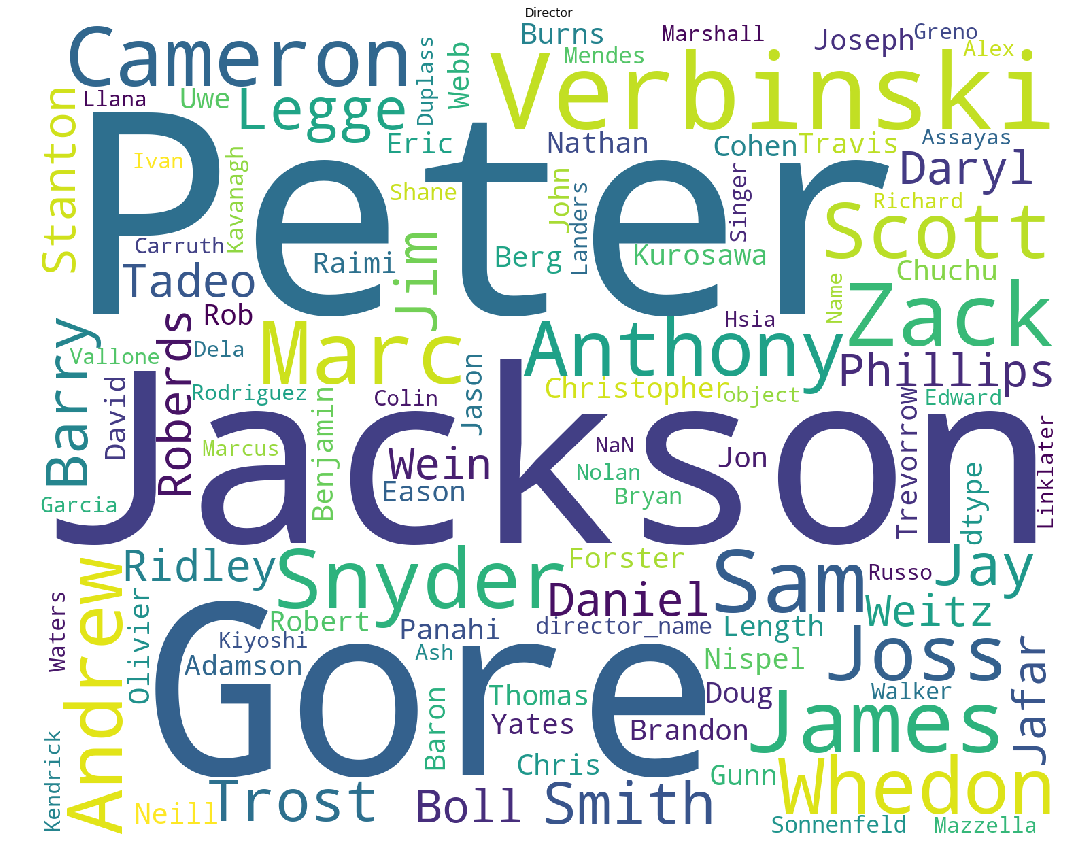

In [111]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(df_rev['director_name']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Director')
plt.axis('off')
plt.show()


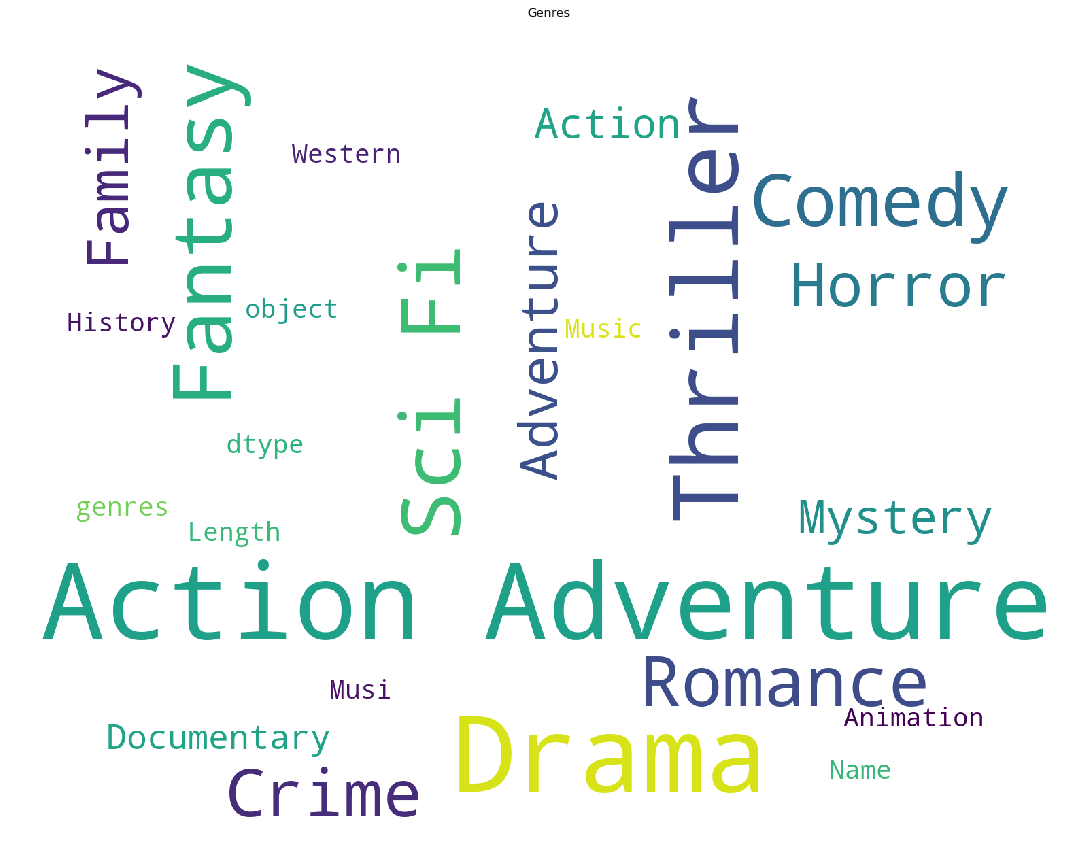

In [112]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(df['genres']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Genres')
plt.axis('off')
plt.show()


Idea for WordCloud:  https://www.kaggle.com/ajithpanner/simple-imdb-data-analysis

# Final Project Work:

## 6. Regression Model

In [113]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE



In [114]:
# setting display options
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [115]:
# info
df_rev.info

<bound method DataFrame.info of            director_name  num_critic_for_reviews  duration  \
0     James Cameron      723.00                  178.00      
1     Gore Verbinski     302.00                  169.00      
2     Sam Mendes         602.00                  148.00      
3     Christopher Nolan  813.00                  164.00      
4     Doug Walker        165.00                  107.00      
5     Andrew Stanton     462.00                  132.00      
6     Sam Raimi          392.00                  156.00      
7     Nathan Greno       324.00                  100.00      
8     Joss Whedon        635.00                  141.00      
9     David Yates        375.00                  153.00      
10    Zack Snyder        673.00                  183.00      
11    Bryan Singer       434.00                  169.00      
12    Marc Forster       403.00                  106.00      
13    Gore Verbinski     313.00                  151.00      
14    Gore Verbinski     450.00       

In [116]:
# This is from class
# Set a default value
df_rev['category'] = 1
df_rev['category'][(df_rev['imdb_score'] > 4) & (df_rev['imdb_score'] <= 6)] = 2
df_rev['category'][(df_rev['imdb_score'] > 6) & (df_rev['imdb_score'] <= 8)] = 3
df_rev['category'][df_rev['imdb_score'] > 8] = 4

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
# Converting Content Rating to variable (using dummy variables)-- From Class
pd.get_dummies(df_rev, columns=["content_rating"]).head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi,category,content_rating_G,content_rating_NC-17,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-MA,content_rating_TV-PG,content_rating_TV-Y,content_rating_TV-Y7
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,237000000.00,2009.00,936.00,7.90,33000,523505847.00,320.89,3,0,0,0,1,0,0,0,0,0,0,0
1,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,300000000.00,2007.00,5000.00,7.10,0,9404152.00,103.13,3,0,0,0,1,0,0,0,0,0,0,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,245000000.00,2015.00,393.00,6.80,85000,-44925825.00,81.66,3,0,0,0,1,0,0,0,0,0,0,0
3,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,250000000.00,2012.00,23000.00,8.50,164000,198130642.00,179.25,4,0,0,0,1,0,0,0,0,0,0,0
4,Doug Walker,165.00,107.00,131.00,760.00,Rob Walker,131.00,51699457.31,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.00,NaN,331.00,45493919.30,nan,12.00,7.10,0,6205538.01,113.64,3,0,0,0,0,1,0,0,0,0,0,0


In [118]:
# More from class to handle movie genre -- Replacing | with a comma
df['genres'] = df['genres'].str.replace('|', ', ')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,"Action, Adventure, Fantasy, Sci-Fi",CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,PG-13,237000000.00,2009.00,936.00,7.90,33000
1,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,"Action, Adventure, Fantasy",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,PG-13,300000000.00,2007.00,5000.00,7.10,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,"Action, Adventure, Thriller",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,PG-13,245000000.00,2015.00,393.00,6.80,85000
3,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,"Action, Thriller",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,PG-13,250000000.00,2012.00,23000.00,8.50,164000
4,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.00,NaN,nan,NaN,nan,nan,12.00,7.10,0


In [119]:
# More from class, using this to split the data and covert to list
df['genres'] = df['genres'].str.split(',')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,PG-13,237000000.00,2009.00,936.00,7.90,33000
1,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,PG-13,300000000.00,2007.00,5000.00,7.10,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,PG-13,245000000.00,2015.00,393.00,6.80,85000
3,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,PG-13,250000000.00,2012.00,23000.00,8.50,164000
4,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,[Documentary],Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.00,NaN,nan,NaN,nan,nan,12.00,7.10,0


In [120]:
# More from class, creating new dataframe with dummy variables for genres
df1 = df['genres'].str.join('|').str.get_dummies()
df1.head()

,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
# More from class, joining our dataframes for a new dataframe
df_final = df_rev.join(df1)
df_final.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,roi,category,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,PG-13,237000000.00,2009.00,936.00,7.90,33000,523505847.00,320.89,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,PG-13,300000000.00,2007.00,5000.00,7.10,0,9404152.00,103.13,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,PG-13,245000000.00,2015.00,393.00,6.80,85000,-44925825.00,81.66,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,PG-13,250000000.00,2012.00,23000.00,8.50,164000,198130642.00,179.25,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Doug Walker,165.00,107.00,131.00,760.00,Rob Walker,131.00,51699457.31,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.00,NaN,331.00,R,45493919.30,nan,12.00,7.10,0,6205538.01,113.64,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
# Dropping imdb_score due to category
df_final = df_final.drop('imdb_score', axis=1)

In [123]:
# DataSet Refresh after drop
df_final.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,movie_facebook_likes,profit,roi,category,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,PG-13,237000000.00,2009.00,936.00,33000,523505847.00,320.89,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,PG-13,300000000.00,2007.00,5000.00,0,9404152.00,103.13,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,PG-13,245000000.00,2015.00,393.00,85000,-44925825.00,81.66,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,PG-13,250000000.00,2012.00,23000.00,164000,198130642.00,179.25,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Doug Walker,165.00,107.00,131.00,760.00,Rob Walker,131.00,51699457.31,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.00,NaN,331.00,R,45493919.30,nan,12.00,0,6205538.01,113.64,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|princess,738.00,PG-13,263700000.00,2012.00,632.00,24000,-190641321.00,27.71,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Sam Raimi,392.00,156.00,0.00,4000.00,James Franco,24000.00,336530303.00,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,1902.00,PG-13,258000000.00,2007.00,11000.00,0,78530303.00,130.44,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Nathan Greno,324.00,100.00,15.00,284.00,Donna Murphy,799.00,200807262.00,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.00,17th century|based on fairy tale|disney|flower|tower,387.00,PG,260000000.00,2010.00,553.00,29000,-59192738.00,77.23,3,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Joss Whedon,635.00,141.00,0.00,19000.00,Robert Downey Jr.,26000.00,458991599.00,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.00,artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero,1117.00,PG-13,250000000.00,2015.00,21000.00,118000,208991599.00,183.60,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,David Yates,375.00,153.00,282.00,10000.00,Daniel Radcliffe,25000.00,301956980.00,Alan Rickman,Harry Potter and the Half-Blood Pr

In [124]:
# Quick Correlation
corr = pd.DataFrame(df_final.corr()['category'].drop('category'))
corr.sort_values(['category'], ascending=False)

,category
num_voted_users,0.38
num_critic_for_reviews,0.27
num_user_for_reviews,0.26
duration,0.23
movie_facebook_likes,0.22
Drama,0.17
director_facebook_likes,0.16
gross,0.16
Drama,0.12
Biography,0.11


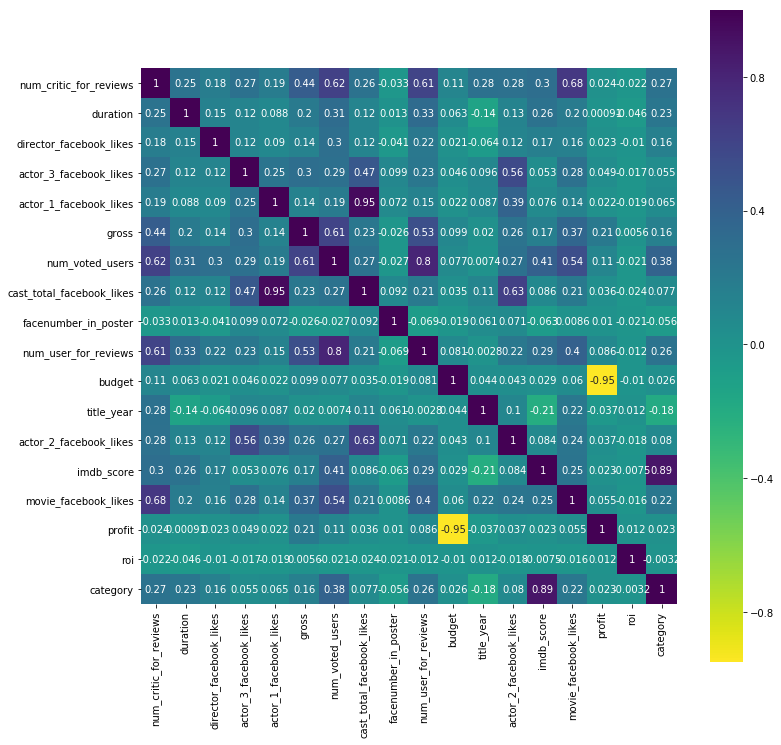

In [125]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_rev.corr(), annot=True, square=True, cmap="viridis_r")

In [126]:
# column refresher
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 69 columns):
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
num_user_for_reviews         5043 non-null float64
content_rating               5043 non-null object
budget                       5043 non

In [127]:
# Null Data
df_final.isnull().sum()

director_name                104
num_critic_for_reviews       0  
duration                     0  
director_facebook_likes      0  
actor_3_facebook_likes       0  
actor_2_name                 13 
actor_1_facebook_likes       0  
gross                        0  
actor_1_name                 7  
movie_title                  0  
num_voted_users              0  
cast_total_facebook_likes    0  
actor_3_name                 23 
facenumber_in_poster         0  
plot_keywords                153
num_user_for_reviews         0  
content_rating               0  
budget                       0  
title_year                   108
actor_2_facebook_likes       0  
movie_facebook_likes         0  
profit                       0  
roi                          0  
category                     0  
 Adventure                   0  
 Animation                   0  
 Biography                   0  
 Comedy                      0  
 Crime                       0  
 Documentary                 0  
          

In [128]:
#assigning columns to X and Y variables, dropping appropriate columns
X = df_final.drop(['category', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'content_rating', 'title_year'], axis =1)
y = df_final['category'] 

In [129]:
# build a multiple regression model below
sub1 = lm.LinearRegression()
sub1.fit(X, y)   
sub1_y = sub1.predict(X)

In [130]:
# Coefficients
sub1.coef_

array([ 6.84577852e-04,  1.34325685e-03,  3.45395082e-06,  7.18392930e-06,
        1.55639089e-05, -6.06542164e-06,  2.07513605e-06, -1.56088911e-05,
       -1.05286392e-02, -2.13102916e-04,  6.06510091e-06,  1.39850503e-05,
       -1.38644348e-06,  6.06510150e-06,  8.00215099e-08,  2.99079217e-02,
        2.44186135e-01,  5.59380916e-02, -9.04317848e-02,  9.92181312e-02,
        4.11313393e-01,  2.25457167e-01, -6.04941103e-02, -5.61661632e-02,
        4.57803989e-01,  3.62729454e-02, -1.64448987e-01, -3.11694193e-02,
        3.57412438e-02,  2.34822513e-02,  2.26467029e-01,  4.34614125e-01,
       -9.82781339e-03, -2.65237658e-02,  4.60864896e-01,  2.71236221e-02,
       -8.70240692e-02,  1.55583910e-01,  6.19359513e-02, -1.36428394e-01,
       -6.37686250e-03,  2.24694165e-01,  4.92130138e-02, -6.15736907e-02,
        8.26825206e-02,  4.67753313e-01,  2.44938041e-01, -3.17222613e-01,
        2.54373121e-01,  4.81750482e-01, -1.87859936e+00,  5.27337975e-01,
       -2.44116951e-01,  

In [131]:
# Coefficients
print 'Coefficients: ', sub1.coef_
print "y-intercept ", sub1.intercept_

Coefficients:  [ 6.84577852e-04  1.34325685e-03  3.45395082e-06  7.18392930e-06
  1.55639089e-05 -6.06542164e-06  2.07513605e-06 -1.56088911e-05
 -1.05286392e-02 -2.13102916e-04  6.06510091e-06  1.39850503e-05
 -1.38644348e-06  6.06510150e-06  8.00215099e-08  2.99079217e-02
  2.44186135e-01  5.59380916e-02 -9.04317848e-02  9.92181312e-02
  4.11313393e-01  2.25457167e-01 -6.04941103e-02 -5.61661632e-02
  4.57803989e-01  3.62729454e-02 -1.64448987e-01 -3.11694193e-02
  3.57412438e-02  2.34822513e-02  2.26467029e-01  4.34614125e-01
 -9.82781339e-03 -2.65237658e-02  4.60864896e-01  2.71236221e-02
 -8.70240692e-02  1.55583910e-01  6.19359513e-02 -1.36428394e-01
 -6.37686250e-03  2.24694165e-01  4.92130138e-02 -6.15736907e-02
  8.26825206e-02  4.67753313e-01  2.44938041e-01 -3.17222613e-01
  2.54373121e-01  4.81750482e-01 -1.87859936e+00  5.27337975e-01
 -2.44116951e-01  4.73970470e-01  1.22038560e-02  1.37648948e-01
 -1.11080455e-01 -5.73420255e-02 -2.79449865e-01  1.35624314e-01]
y-interce

In [132]:
# Converting to Dataframe
pd.DataFrame(zip(X.columns, np.transpose(sub1.coef_)))

,0,1
0,num_critic_for_reviews,0.00
1,duration,0.00
2,director_facebook_likes,0.00
3,actor_3_facebook_likes,0.00
4,actor_1_facebook_likes,0.00
5,gross,-0.00
6,num_voted_users,0.00
7,cast_total_facebook_likes,-0.00
8,facenumber_in_poster,-0.01
9,num_user_for_reviews,-0.00


In [133]:
# Limiting the number of decimal points
coef = ["%.3f" % i for i in sub1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.001'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.011'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000'),
 ('roi', '0.000'),
 (' Adventure', '0.030'),
 (' Animation', '0.244'),
 (' Biography', '0.056'),
 (' Comedy', '-0.090'),
 (' Crime', '0.099'),
 (' Documentary', '0.411'),
 (' Drama', '0.225'),
 (' Family', '-0.060'),
 (' Fantasy', '-0.056'),
 (' Film-Noir', '0.458'),
 (' History', '0.036'),
 (' Horror', '-0.164'),
 (' Music', '-0.031'),
 (' Musical', '0.036'),
 (' Mystery', '0.023'),
 (' News', '0.226'),
 (' Reality-TV', '0.435'),
 (' Romance', '-0.010'),
 (' Sci-Fi', '-0.027'),
 (' Short', '0.461'),
 (' Sport', '0.027'),
 (' Thr

### Model Evaluation

In [134]:
print "mean square error: ", mean_squared_error(y, sub1_y)
print "variance or r-squared: ", explained_variance_score(y, sub1_y)

mean square error:  0.2662961011301224
variance or r-squared:  0.29699054323355134


#### As we can see, our multiple regression model is not a very good start at 30% accurate.

In [135]:
df_final.shape

(5043, 69)

## Lasso model

In [136]:
#assigning columns to X and Y variables
X = df_final.drop(['category', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'content_rating', 'title_year'], axis =1)
y = df_final['category'] 

In [137]:
#Fit the model -- Lasso
sub3 = lm.Lasso(alpha=0.1) 
sub3.fit(X, y)
sub3_y = sub3.predict(X)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [138]:
print 'Coefficients: ', sub3.coef_
print "y-intercept ", sub3.intercept_

Coefficients:  [ 4.31335338e-04  3.14844170e-03  7.31238259e-06  2.91457045e-05
  3.30577005e-05 -9.17399104e-10  2.22211192e-06 -3.33375735e-05
 -0.00000000e+00 -2.66260867e-04 -2.90084671e-11  3.38484369e-05
 -3.66139823e-07 -1.87834447e-11  1.17320933e-07 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
y-interce

In [139]:
# Limiting decimal places
coef = ["%.3f" % i for i in sub3.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('num_critic_for_reviews', '0.000'),
 ('duration', '0.003'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000'),
 ('roi', '0.000'),
 (' Adventure', '-0.000'),
 (' Animation', '0.000'),
 (' Biography', '0.000'),
 (' Comedy', '-0.000'),
 (' Crime', '-0.000'),
 (' Documentary', '0.000'),
 (' Drama', '0.000'),
 (' Family', '-0.000'),
 (' Fantasy', '-0.000'),
 (' Film-Noir', '0.000'),
 (' History', '0.000'),
 (' Horror', '-0.000'),
 (' Music', '0.000'),
 (' Musical', '0.000'),
 (' Mystery', '-0.000'),
 (' News', '0.000'),
 (' Reality-TV', '-0.000'),
 (' Romance', '0.000'),
 (' Sci-Fi', '-0.000'),
 (' Short', '0.000'),
 (' Sport', '0.000'),
 ('

In [140]:
# Converting to dataframe
a = zip(xcolumns, coef)
df = pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
1,duration,0.003
0,num_critic_for_reviews,0.000
40,Adventure,0.000
27,Music,0.000
28,Musical,0.000
32,Romance,0.000
34,Short,0.000
35,Sport,0.000
37,War,0.000
38,Western,0.000


In [141]:
# Perform sort
sorted(zip(coef, xcolumns), reverse=True)

[('0.003', 'duration'),
 ('0.000', 'roi'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'num_critic_for_reviews'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'actor_3_facebook_likes'),
 ('0.000', 'actor_2_facebook_likes'),
 ('0.000', 'actor_1_facebook_likes'),
 ('0.000', 'Western'),
 ('0.000', 'Music'),
 ('0.000', 'History'),
 ('0.000', 'Film-Noir'),
 ('0.000', 'Fantasy'),
 ('0.000', 'Drama'),
 ('0.000', 'Documentary'),
 ('0.000', 'Crime'),
 ('0.000', 'Biography'),
 ('0.000', 'Animation'),
 ('0.000', 'Adventure'),
 ('0.000', ' Western'),
 ('0.000', ' War'),
 ('0.000', ' Sport'),
 ('0.000', ' Short'),
 ('0.000', ' Romance'),
 ('0.000', ' News'),
 ('0.000', ' Musical'),
 ('0.000', ' Music'),
 ('0.000', ' History'),
 ('0.000', ' Film-Noir'),
 ('0.000', ' Drama'),
 ('0.000', ' Documentary'),
 ('0.000', ' Biography'),
 ('0.000', ' Animation'),
 ('-0.000', 'profit'),
 ('-0.000', 'num_user_for_reviews'),
 ('-0.000', 'movie_facebook_likes'),
 ('-0.000', 'gross'),
 ('-0.000', 'facenumber_in

In [142]:
# Evaluate model
print "mean square error: ", mean_squared_error(y, sub3_y)
print "variance or r-squared: ", explained_variance_score(y, sub3_y)

mean square error:  0.3069573732338713
variance or r-squared:  0.18964665538924008


#### at 19% this model is still terrible

### Ridge: Regularization Technique

In [143]:
#Fit the model -- Ridge (X/y variables already set)
rig = lm.Ridge(alpha=0.1)           
rig.fit(X, y)
rig_y = rig.predict(X)

In [144]:
# Print results
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 6.85445989e-04  1.33854607e-03  3.47483914e-06  7.05248346e-06
  1.54794405e-05  3.23962255e-05  2.07436927e-06 -1.55250856e-05
 -1.05373914e-02 -2.12883676e-04 -3.23965462e-05  1.38945020e-05
 -1.38820322e-06 -3.23965457e-05  8.00484681e-08  2.99039416e-02
  2.43868968e-01  5.57878875e-02 -9.03416737e-02  9.90841228e-02
  4.10629217e-01  2.25589247e-01 -6.04177030e-02 -5.62175821e-02
  4.48711985e-01  3.64043001e-02 -1.64440040e-01 -3.12062266e-02
  3.57451946e-02  2.35542245e-02  2.19503757e-01  2.53391544e-01
 -9.81972991e-03 -2.65853512e-02  4.50888707e-01  2.70594552e-02
 -8.69919735e-02  1.55540863e-01  6.18799106e-02 -1.46405442e-01
 -1.63105911e-02  2.14150652e-01  3.91936089e-02 -7.14428245e-02
  7.26626068e-02  4.57478348e-01  2.34984244e-01 -3.24210873e-01
  2.43818086e-01  4.28527604e-01 -1.55199264e+00  4.70135385e-01
 -2.54075992e-01  4.21800158e-01  2.26457347e-03  1.27209952e-01
 -1.17451730e-01 -6.68710153e-02 -2.88074470e-01  1.24642098e-01]
y-interce

In [145]:
# Limit the decimal places
rig_coef = ["%.3f" % i for i in rig.coef_]
rig_xcolumns = [ i for i in X.columns ]
zip(rig_xcolumns, rig_coef)

[('num_critic_for_reviews', '0.001'),
 ('duration', '0.001'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.011'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '-0.000'),
 ('roi', '0.000'),
 (' Adventure', '0.030'),
 (' Animation', '0.244'),
 (' Biography', '0.056'),
 (' Comedy', '-0.090'),
 (' Crime', '0.099'),
 (' Documentary', '0.411'),
 (' Drama', '0.226'),
 (' Family', '-0.060'),
 (' Fantasy', '-0.056'),
 (' Film-Noir', '0.449'),
 (' History', '0.036'),
 (' Horror', '-0.164'),
 (' Music', '-0.031'),
 (' Musical', '0.036'),
 (' Mystery', '0.024'),
 (' News', '0.220'),
 (' Reality-TV', '0.253'),
 (' Romance', '-0.010'),
 (' Sci-Fi', '-0.027'),
 (' Short', '0.451'),
 (' Sport', '0.027'),
 (' Th

In [146]:
# Convert to dataframe
a = zip(rig_xcolumns, rig_coef)
df = pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
51,History,0.470
45,Documentary,0.457
34,Short,0.451
24,Film-Noir,0.449
49,Film-Noir,0.429
53,Music,0.422
20,Documentary,0.411
31,Reality-TV,0.253
16,Animation,0.244
48,Fantasy,0.244


In [147]:
# Sort
sorted(zip(rig_coef, rig_xcolumns), reverse=True)

[('0.470', 'History'),
 ('0.457', 'Documentary'),
 ('0.451', ' Short'),
 ('0.449', ' Film-Noir'),
 ('0.429', 'Film-Noir'),
 ('0.422', 'Music'),
 ('0.411', ' Documentary'),
 ('0.253', ' Reality-TV'),
 ('0.244', 'Fantasy'),
 ('0.244', ' Animation'),
 ('0.235', 'Drama'),
 ('0.226', ' Drama'),
 ('0.220', ' News'),
 ('0.214', 'Animation'),
 ('0.156', ' War'),
 ('0.127', 'Mystery'),
 ('0.125', 'Western'),
 ('0.099', ' Crime'),
 ('0.073', 'Crime'),
 ('0.062', ' Western'),
 ('0.056', ' Biography'),
 ('0.039', 'Biography'),
 ('0.036', ' Musical'),
 ('0.036', ' History'),
 ('0.030', ' Adventure'),
 ('0.027', ' Sport'),
 ('0.024', ' Mystery'),
 ('0.002', 'Musical'),
 ('0.001', 'num_critic_for_reviews'),
 ('0.001', 'duration'),
 ('0.000', 'roi'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'gross'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'actor_3_facebook_likes'),
 ('0.000', 'actor_2_facebook_likes'),
 ('0.000', 'actor_1_facebook_likes'),
 ('-1.552', 'Game-Show'),
 ('-0.324', 'Family'),
 

### f_Regression (Feature Selection)

In [148]:
#selec only 3 X variables
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_new

array([[7.23000e+02, 1.78000e+02, 8.86204e+05, 3.05400e+03, 3.30000e+04],
       [3.02000e+02, 1.69000e+02, 4.71220e+05, 1.23800e+03, 0.00000e+00],
       [6.02000e+02, 1.48000e+02, 2.75868e+05, 9.94000e+02, 8.50000e+04],
       ...,
       [1.30000e+01, 7.60000e+01, 3.80000e+01, 3.00000e+00, 1.60000e+01],
       [1.40000e+01, 1.00000e+02, 1.25500e+03, 9.00000e+00, 6.60000e+02],
       [4.30000e+01, 9.00000e+01, 4.28500e+03, 8.40000e+01, 4.56000e+02]])

In [149]:
sub10 = lm.LinearRegression()
sub10.fit(X_new, y)
sub10_y = sub10.predict(X_new)

print "mean square error: ", mean_squared_error(y, sub10_y)
print "variance or r-squared: ", explained_variance_score(y, sub10_y)

mean square error:  0.31327305270892136
variance or r-squared:  0.1729735521105089


#### This model is showing 17% accurate

### Recursive Feature Selection (RFE): Another Feature Selection Method

In [150]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Columns sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Columns sorted by their rank:
[(1, 'Family'), (1, 'Game-Show'), (2, 'Thriller'), (3, 'Horror'), (4, 'Romance'), (5, 'Musical'), (6, 'Sci-Fi'), (7, 'Comedy'), (8, 'Action'), (9, 'Fantasy'), (10, 'Adventure'), (11, 'Western'), (12, 'Animation'), (13, 'Mystery'), (14, 'Drama'), (15, 'Crime'), (16, 'History'), (17, 'Biography'), (18, 'Music'), (19, 'Film-Noir'), (20, 'Documentary'), (21, ' Reality-TV'), (22, ' Horror'), (23, ' Film-Noir'), (24, ' Documentary'), (25, ' Short'), (26, ' Drama'), (27, ' News'), (28, ' War'), (29, ' Animation'), (30, ' Comedy'), (31, ' Family'), (32, ' Adventure'), (33, ' Crime'), (34, ' Thriller'), (35, ' Music'), (36, ' Biography'), (37, ' Mystery'), (38, ' Sci-Fi'), (39, ' Romance'), (40, ' History'), (41, ' Western'), (42, 'facenumber_in_poster'), (43, ' Fantasy'), (44, ' Musical'), (45, ' Sport'), (46, 'duration'), (47, 'num_critic_for_reviews'), (48, 'num_user_for_reviews'), (49, 'actor_2_facebook_likes'), (50, 'actor_1_facebook_likes'), (51, 'cast_total_

### Random Forest Generator (will it be the most accurate as predicted?)

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
X = df_final.drop(['category', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'content_rating', 'title_year'], axis =1)
y = df_final['category'] 

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.04163989688677375
variance or r-squared:  0.8901145260199779


#### Random Forest Generator shows the other models up, again, and comes in with 89% accuracy.  

## 7. Classification

In [152]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

In [153]:
# column refresher
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 69 columns):
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
num_user_for_reviews         5043 non-null float64
content_rating               5043 non-null object
budget                       5043 non

#### Decision Tree

In [154]:
# declare X variables and y variable
X = df_final.drop(['category', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'content_rating', 'title_year', 'facenumber_in_poster'], axis =1)
y = df_final['category'] 

In [155]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()
# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

3530 3530
1513 1513


In [157]:
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"

0.637144745538665
--------------------------------------------------------
[[  6  30  18   0]
 [ 36 216 178   1]
 [ 20 187 698  38]
 [  6   4  31  44]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.09      0.11      0.10        54
          2       0.49      0.50      0.50       431
          3       0.75      0.74      0.75       943
          4       0.53      0.52      0.52        85

avg / total       0.64      0.64      0.64      1513

--------------------------------------------------------


##### This model is 64% Accurate

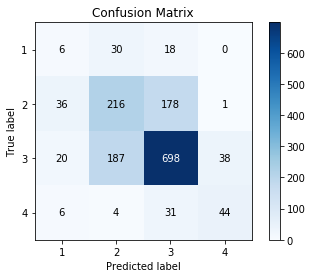

In [158]:
# Shows us the confusion matrix, this is a good graphical representation
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

In [159]:
# Visualizing Decision Tree
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/final_dt.pdf")

True

In [160]:
# Decision tree cannot be imbedded due to its size, but wanted to show the work above regardless

In [161]:
# evaluate the decision tree model using 100-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=100)
print scores
print scores.mean()

[0.66037736 0.67924528 0.64150943 0.66037736 0.66037736 0.61538462
 0.86538462 0.65384615 0.53846154 0.65384615 0.67307692 0.64705882
 0.66666667 0.7254902  0.68627451 0.60784314 0.60784314 0.58823529
 0.70588235 0.66666667 0.7254902  0.56862745 0.62745098 0.7254902
 0.68627451 0.54901961 0.66666667 0.68627451 0.68627451 0.60784314
 0.76470588 0.62745098 0.7254902  0.7254902  0.70588235 0.70588235
 0.66666667 0.74509804 0.68627451 0.68627451 0.76470588 0.7254902
 0.70588235 0.74509804 0.62745098 0.68627451 0.60784314 0.74509804
 0.58823529 0.66666667 0.74509804 0.70588235 0.60784314 0.7
 0.66       0.58       0.68       0.72       0.68       0.68
 0.62       0.6        0.6        0.6        0.62       0.68
 0.6        0.6        0.74       0.68       0.6        0.54
 0.66       0.7        0.57142857 0.48979592 0.67346939 0.73469388
 0.55102041 0.71428571 0.6122449  0.67346939 0.65306122 0.69387755
 0.69387755 0.67346939 0.63265306 0.67346939 0.57142857 0.59183673
 0.81632653 0.51020408

#### Interesting, after 100 validation passes, our model still only scored a 65% accuracy.

### Random Forest (Ensemble model):

In [162]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7243886318572372

In [163]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7243886318572372
[[  3  32  19   0]
 [  6 227 198   0]
 [  0  90 850   3]
 [  0   2  67  16]]
             precision    recall  f1-score   support

          1       0.33      0.06      0.10        54
          2       0.65      0.53      0.58       431
          3       0.75      0.90      0.82       943
          4       0.84      0.19      0.31        85

avg / total       0.71      0.72      0.70      1513



##### 72% accuracy

In [164]:
# Columns sorted by importance
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0, ' Short'), (0.0, 'Film-Noir'), (0.0, 'History'), (0.0, 'Music'), (0.0, 'Musical'), (0.0001, ' News'), (0.0001, 'Romance'), (0.0002, 'Game-Show'), (0.0003, ' Reality-TV'), (0.0005, ' Film-Noir'), (0.0006, 'Family'), (0.0007, ' Documentary'), (0.0007, 'Fantasy'), (0.0007, 'Sci-Fi'), (0.0009, ' Biography'), (0.0009, 'Thriller'), (0.0009, 'Western'), (0.001, 'Mystery'), (0.0013, 'Animation'), (0.0018, ' Sport'), (0.0026, ' Musical'), (0.0028, 'Documentary'), (0.003, ' Animation'), (0.003, ' Western'), (0.0034, ' History'), (0.0036, ' Music'), (0.0036, ' War'), (0.0036, 'Crime'), (0.0038, 'Biography'), (0.0039, ' Adventure'), (0.0041, 'Adventure'), (0.0054, ' Crime'), (0.0059, ' Family'), (0.0061, ' Comedy'), (0.0061, 'Horror'), (0.0063, ' Mystery'), (0.007, ' Horror'), (0.0075, ' Sci-Fi'), (0.0077, ' Fantasy'), (0.0085, 'Comedy'), (0.009, ' Romance'), (0.0101, 'Action'), (0.0102, ' Thriller'), (0.0135, 'Drama'), (0.0169, ' Drama'), (0.046, 'movie_faceb

In [165]:
# This time in a dataframe
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
6,num_voted_users,0.12
1,duration,0.08
0,num_critic_for_reviews,0.07
8,num_user_for_reviews,0.06
7,cast_total_facebook_likes,0.06
13,roi,0.05
9,budget,0.05
12,profit,0.05
3,actor_3_facebook_likes,0.05
4,actor_1_facebook_likes,0.05


#### KNN Model

In [166]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [167]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.5393258426966292
--------------------------------------------------------
[[  5  15  34   0]
 [ 22 135 272   2]
 [ 33 222 670  18]
 [  3  14  62   6]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.08      0.09      0.09        54
          2       0.35      0.31      0.33       431
          3       0.65      0.71      0.68       943
          4       0.23      0.07      0.11        85

avg / total       0.52      0.54      0.52      1513

--------------------------------------------------------


#### This model is only 54% accurate, we have more accurate models. 

In [168]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.55029586 0.49604743 0.4743083  0.47524752 0.40674603 0.40159046
 0.39960239 0.4473161  0.39960239 0.48310139]
0.45338578693700204


##### This did not help our scores, moving on

### Logical Regression

In [169]:
# Logical Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
# Looking for accuracy
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.6153337739590218
--------------------------------------------------------
[[  0   0  54   0]
 [  0   0 429   2]
 [  0   0 899  44]
 [  0   0  53  32]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        54
          2       0.00      0.00      0.00       431
          3       0.63      0.95      0.76       943
          4       0.41      0.38      0.39        85

avg / total       0.41      0.62      0.49      1513

--------------------------------------------------------


/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Our model shows 62% accuracy.

### Recursive Feature Selection (RFE)

In [171]:
model = LogisticRegression()
rfe = RFE(model, 4)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False]
[ 1  1  3  4  6 12  9  7  2 11  5  8 16 10 34 42 39 25 18 36  1 35 30 51
 28 20 26 33 21 53 49 14 24 46 32 15 29 37 17 31 40 22 13 19 27  1 44 38
 54 48 56 23 55 52 41 47 45 43 50]


In [172]:
X.head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,profit,roi,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,723.00,178.00,0.00,855.00,1000.00,760505847.00,886204,4834,3054.00,237000000.00,936.00,33000,523505847.00,320.89,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,302.00,169.00,563.00,1000.00,40000.00,309404152.00,471220,48350,1238.00,300000000.00,5000.00,0,9404152.00,103.13,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,602.00,148.00,0.00,161.00,11000.00,200074175.00,275868,11700,994.00,245000000.00,393.00,85000,-44925825.00,81.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,813.00,164.00,22000.00,23000.00,27000.00,448130642.00,1144337,106759,2701.00,250000000.00,23000.00,164000,198130642.00,179.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,165.00,107.00,131.00,760.00,131.00,51699457.31,8,143,331.00,45493919.30,12.00,0,6205538.01,113.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,num_critic_for_reviews,1
1,duration,1
2,director_facebook_likes,3
3,actor_3_facebook_likes,4
4,actor_1_facebook_likes,6
5,gross,12
6,num_voted_users,9
7,cast_total_facebook_likes,7
8,num_user_for_reviews,2
9,budget,11


In [174]:
# Models by importance
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

1.0
[5.95275252e-02 5.77759106e-02 5.18419783e-02 4.56098717e-02
 4.38352764e-02 4.84017132e-02 1.03963205e-01 4.59658487e-02
 5.41054613e-02 5.07371780e-02 4.59396983e-02 4.71924970e-02
 4.45187611e-02 4.79434774e-02 8.18469302e-03 4.44944849e-03
 1.26787723e-03 7.79765899e-03 1.00534718e-02 2.34657695e-03
 2.27201897e-02 9.79964618e-03 1.27540761e-02 3.53257782e-04
 4.42827262e-03 1.29711939e-02 7.43973503e-03 4.77045667e-03
 9.44879138e-03 3.70102695e-04 1.77507799e-04 1.47242599e-02
 1.27864095e-02 4.32444991e-04 5.93239190e-03 1.71229435e-02
 5.54116269e-03 3.34311325e-03 1.15246597e-02 5.49141164e-03
 1.20620424e-03 5.50418222e-03 9.32549182e-03 4.73790329e-03
 3.42800737e-03 1.39612108e-02 1.04367207e-03 2.01819077e-03
 0.00000000e+00 3.01693008e-04 5.34859462e-05 9.44872318e-03
 7.78415589e-05 3.05960525e-04 1.09176325e-03 2.48109073e-04
 9.24920658e-04 1.83719919e-03 8.95284949e-04]


In [175]:
# Sorting by rank
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0, 'Film-Noir'), (0.0001, 'History'), (0.0001, 'Music'), (0.0002, ' Reality-TV'), (0.0002, 'Romance'), (0.0003, 'Game-Show'), (0.0003, 'Musical'), (0.0004, ' Film-Noir'), (0.0004, ' News'), (0.0004, ' Short'), (0.0009, 'Sci-Fi'), (0.0009, 'Western'), (0.001, 'Family'), (0.0011, 'Mystery'), (0.0012, 'Animation'), (0.0013, ' Biography'), (0.0018, 'Thriller'), (0.002, 'Fantasy'), (0.0023, ' Documentary'), (0.0033, ' Western'), (0.0034, 'Documentary'), (0.0044, ' Animation'), (0.0044, ' History'), (0.0047, 'Crime'), (0.0048, ' Musical'), (0.0055, ' War'), (0.0055, 'Adventure'), (0.0055, 'Biography'), (0.0059, ' Sport'), (0.0074, ' Music'), (0.0078, ' Comedy'), (0.0082, ' Adventure'), (0.0093, 'Comedy'), (0.0094, ' Mystery'), (0.0094, 'Horror'), (0.0098, ' Family'), (0.0101, ' Crime'), (0.0115, 'Action'), (0.0128, ' Fantasy'), (0.0128, ' Sci-Fi'), (0.013, ' Horror'), (0.014, 'Drama'), (0.0147, ' Romance'), (0.0171, ' Thriller'), (0.0227, ' Drama'), (0.0438

## 8. Clustering

In [177]:
# Import Packages
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [178]:
# Column Refresh
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 69 columns):
director_name                4939 non-null object
num_critic_for_reviews       5043 non-null float64
duration                     5043 non-null float64
director_facebook_likes      5043 non-null float64
actor_3_facebook_likes       5043 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5043 non-null float64
gross                        5043 non-null float64
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5043 non-null float64
plot_keywords                4890 non-null object
num_user_for_reviews         5043 non-null float64
content_rating               5043 non-null object
budget                       5043 non

In [179]:
# Dropping object columns as well as Genre names as they are not showing as important
df_cluster = df_final.drop(['profit', 'roi', 'category', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'content_rating', 'title_year', 'facenumber_in_poster', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western', ' Adventure', ' Animation', ' Biography', ' Comedy', ' Crime', ' Documentary', ' Drama', ' Family', ' Fantasy', ' Film-Noir', ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' News', ' Reality-TV', ' Romance', ' Sci-Fi', ' Short', ' Sport', ' Thriller', ' War', ' Western', 'Action', 'Game-Show'], axis =1)
df_cluster.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,723.00,178.00,0.00,855.00,1000.00,760505847.00,886204,4834,3054.00,237000000.00,936.00,33000
1,302.00,169.00,563.00,1000.00,40000.00,309404152.00,471220,48350,1238.00,300000000.00,5000.00,0
2,602.00,148.00,0.00,161.00,11000.00,200074175.00,275868,11700,994.00,245000000.00,393.00,85000
3,813.00,164.00,22000.00,23000.00,27000.00,448130642.00,1144337,106759,2701.00,250000000.00,23000.00,164000
4,165.00,107.00,131.00,760.00,131.00,51699457.31,8,143,331.00,45493919.30,12.00,0


In [180]:
# Converting to int
df_cluster.num_critic_for_reviews = df_cluster.num_critic_for_reviews.astype(int)
df_cluster.duration = df_cluster.duration.astype(int)
df_cluster.director_facebook_likes = df_cluster.director_facebook_likes.astype(int)
df_cluster.actor_3_facebook_likes = df_cluster.actor_3_facebook_likes.astype(int)
df_cluster.actor_1_facebook_likes = df_cluster.actor_1_facebook_likes.astype(int)
df_cluster.actor_2_facebook_likes = df_cluster.actor_2_facebook_likes.astype(int)
df_cluster.gross = df_cluster.gross.astype(int)
df_cluster.num_user_for_reviews  = df_cluster.num_user_for_reviews.astype(int)
df_cluster.budget = df_cluster.budget.astype(int)

In [181]:
# Determining info
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
num_critic_for_reviews       5043 non-null int64
duration                     5043 non-null int64
director_facebook_likes      5043 non-null int64
actor_3_facebook_likes       5043 non-null int64
actor_1_facebook_likes       5043 non-null int64
gross                        5043 non-null int64
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
num_user_for_reviews         5043 non-null int64
budget                       5043 non-null int64
actor_2_facebook_likes       5043 non-null int64
movie_facebook_likes         5043 non-null int64
dtypes: int64(12)
memory usage: 472.9 KB


In [182]:
# Looking for Null
df.isnull().sum()

0    0
1    0
dtype: int64

In [183]:
# Normalizing data
df_norm = (df_cluster - df_cluster.mean()) / (df_cluster.max() - df_cluster.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
0,0.72,0.14,-0.03,0.01,-0.01,0.94,0.47,-0.01,0.55,0.02,-0.01,0.07
1,0.20,0.12,-0.01,0.02,0.05,0.34,0.23,0.06,0.19,0.02,0.02,-0.02
2,0.57,0.08,-0.03,-0.02,0.01,0.20,0.11,0.00,0.14,0.02,-0.01,0.22
3,0.83,0.11,0.93,0.97,0.03,0.52,0.63,0.15,0.48,0.02,0.16,0.45
4,0.03,-0.00,-0.02,0.00,-0.01,0.00,-0.05,-0.01,0.01,0.00,-0.01,-0.02


## K-Means Analysis

In [184]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

In [185]:
# fitting model
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [186]:
# cluster labels
k_means.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [187]:
# find out cluster centers
k_means.cluster_centers_

array([[ 0.08347513,  0.00421634, -0.02117151,  0.00305682,  0.00358603,
         0.0022701 ,  0.01409776,  0.0042976 ,  0.01744849,  0.00097358,
         0.00294951,  0.00371536],
       [-0.09773858, -0.0093127 , -0.02418216, -0.01188137, -0.00399236,
        -0.02392711, -0.03625399, -0.00577438, -0.03262696, -0.00116821,
        -0.00565742, -0.01863972],
       [ 0.11270392,  0.03447244,  0.60781752,  0.03495515,  0.01002074,
         0.0506395 ,  0.10326815,  0.01481124,  0.07055157,  0.00075602,
         0.01469632,  0.03499041],
       [ 0.32548007,  0.03628945, -0.01714361,  0.06143288,  0.00978672,
         0.15135688,  0.16730179,  0.01806741,  0.13992692,  0.00429553,
         0.02338286,  0.11121958]])

In [188]:
# convert cluster lables to dataframe
df_final_cluster = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df_final_cluster.head()

,cluster
0,3
1,3
2,3
3,2
4,0


In [189]:
# join df_norm & df_final_cluster
df_5 = df_norm.join(df_final_cluster)
df_5.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
0,0.72,0.14,-0.03,0.01,-0.01,0.94,0.47,-0.01,0.55,0.02,-0.01,0.07,3
1,0.20,0.12,-0.01,0.02,0.05,0.34,0.23,0.06,0.19,0.02,0.02,-0.02,3
2,0.57,0.08,-0.03,-0.02,0.01,0.20,0.11,0.00,0.14,0.02,-0.01,0.22,3
3,0.83,0.11,0.93,0.97,0.03,0.52,0.63,0.15,0.48,0.02,0.16,0.45,2
4,0.03,-0.00,-0.02,0.00,-0.01,0.00,-0.05,-0.01,0.01,0.00,-0.01,-0.02,0


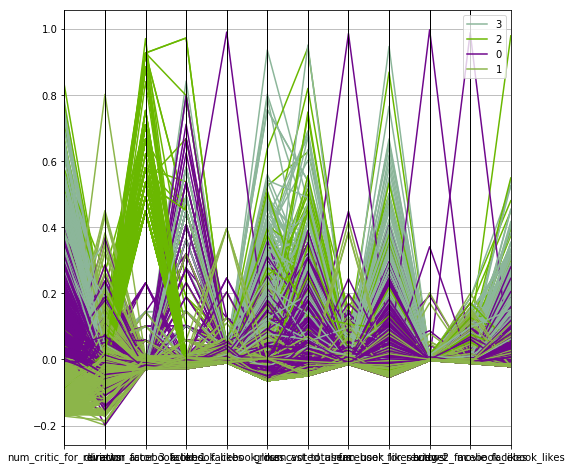

In [190]:
# Visualization
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,8))
parallel_coordinates(df_5, 'cluster')

In [191]:
# Looking for important columns
df_5.groupby(['cluster']).mean() 

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,
0,0.08,0.00,-0.02,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00
1,-0.10,-0.01,-0.02,-0.01,-0.00,-0.02,-0.04,-0.01,-0.03,-0.00,-0.01,-0.02
2,0.11,0.03,0.61,0.03,0.01,0.05,0.10,0.01,0.07,0.00,0.01,0.03
3,0.33,0.04,-0.02,0.06,0.01,0.15,0.17,0.02,0.14,0.00,0.02,0.11


#### Our important columns appear to be Num_Critic_For_Reviews, Director_Facebook_Likes, Num_Voted_Users

### Determine an optimal value of k

Text(0.5,1,'Selecting k with the Elbow Method')

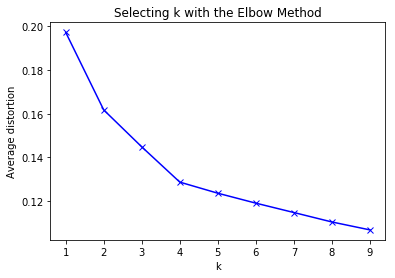

In [192]:
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

- The graph suggest that 3 or 4 is a good value for K
- The average distortion improves rapidly as we increase  from 1 to 2 and 2 to 3. 
- There is little improvement for values of greater than 4. 

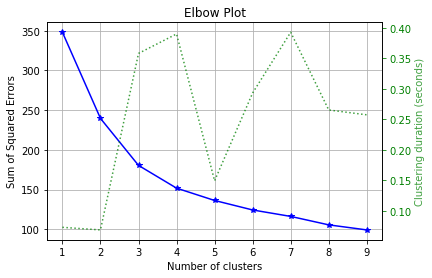

In [193]:
# Normalization Curve
import scikitplot as skplt
kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

### The Sihouette Method

In [194]:
# Silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df_norm)
labels = kmeans_model.labels_
metrics.silhouette_score(df_norm, labels, metric='euclidean')

0.36452510765244234

In [195]:
#adapted from http://scikit-learn.org/stable/modules/clustering.html
# Multiple pass method
tests = [2, 3, 4, 5, 8]
for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(df_norm, labels, metric='euclidean')

0.5466077962002244
0.5108394521427807
0.36452510765244234
0.3609125901161117
0.28760681267387056


#### As we can see the multiple pass method provided better results, but still only 55%


### Hierarchical Clustering Algorithms

In [196]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [197]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 0, 0, ..., 0, 0, 0])

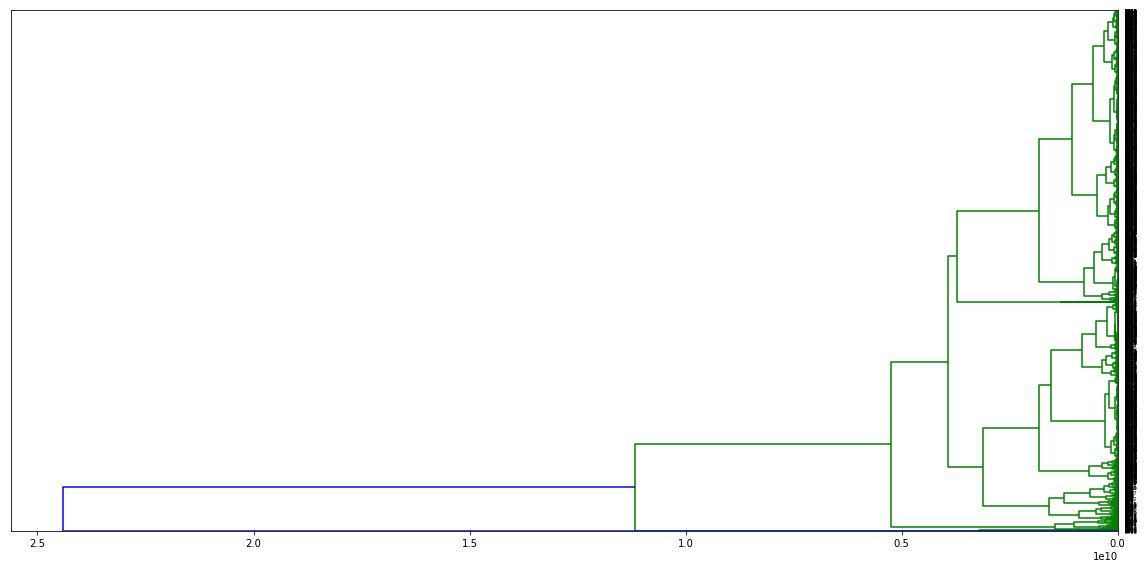

In [198]:
# Visualization
plt.figure(figsize=(16,8))
linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

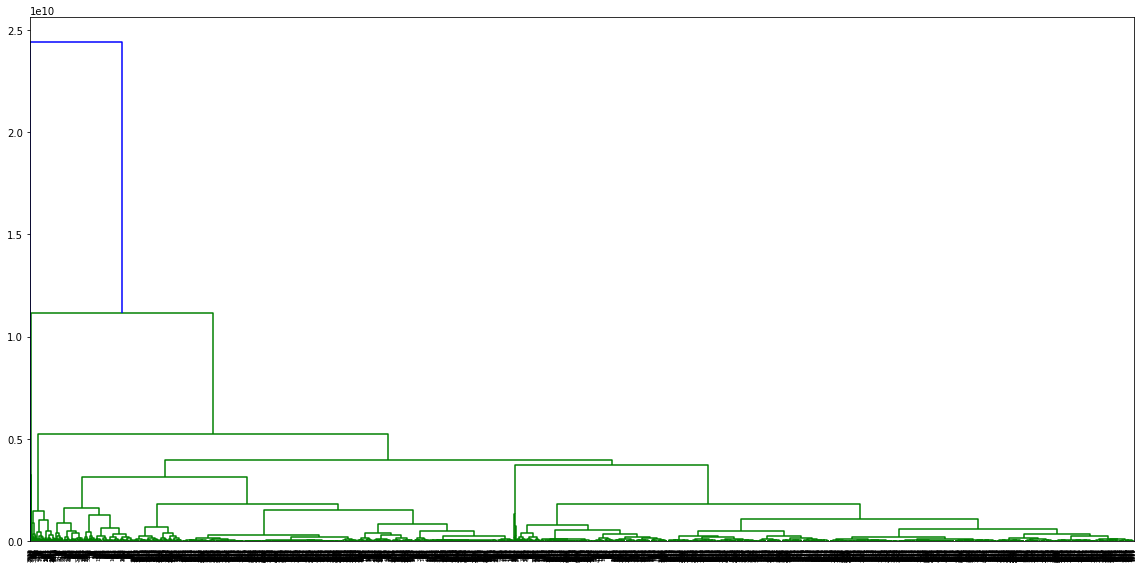

In [199]:
# Top Orientation
plt.figure(figsize=(16,8))
linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

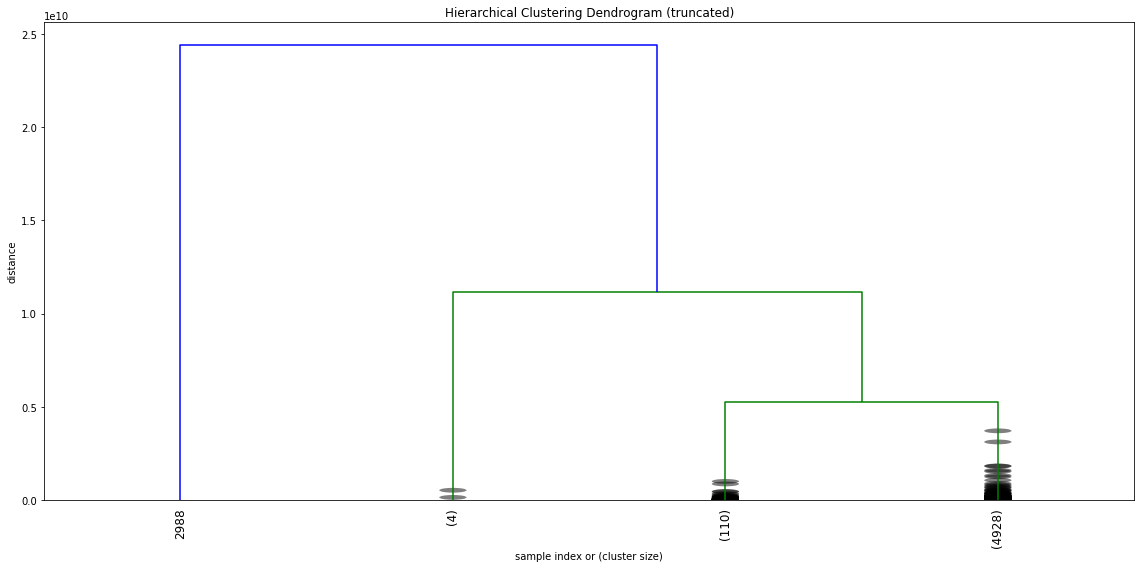

In [200]:
# Truncated Visualization
plt.figure(figsize=(16,8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [201]:
#To add cluster label into the dataset as a column
df_6 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df_6.head()

,cluster
0,1
1,0
2,0
3,1
4,0


In [202]:
df_7 = df_norm.join(df_6)
df_7.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes,cluster
0,0.72,0.14,-0.03,0.01,-0.01,0.94,0.47,-0.01,0.55,0.02,-0.01,0.07,1
1,0.20,0.12,-0.01,0.02,0.05,0.34,0.23,0.06,0.19,0.02,0.02,-0.02,0
2,0.57,0.08,-0.03,-0.02,0.01,0.20,0.11,0.00,0.14,0.02,-0.01,0.22,0
3,0.83,0.11,0.93,0.97,0.03,0.52,0.63,0.15,0.48,0.02,0.16,0.45,1
4,0.03,-0.00,-0.02,0.00,-0.01,0.00,-0.05,-0.01,0.01,0.00,-0.01,-0.02,0


In [203]:
df_7.groupby('cluster').mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,movie_facebook_likes
cluster,,,,,,,,,,,,
0,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00
1,0.25,0.04,0.07,0.11,0.01,0.36,0.23,0.02,0.18,0.01,0.03,0.08
2,-0.00,0.03,0.04,-0.02,-0.01,-0.06,-0.01,-0.01,-0.01,0.23,-0.01,-0.01
3,0.27,0.01,-0.00,-0.02,-0.01,-0.06,-0.01,-0.01,0.00,1.00,-0.01,-0.00


In [204]:
df_7.groupby('cluster').size()

cluster
0    4928
1    110 
2    4   
3    1   
dtype: int64

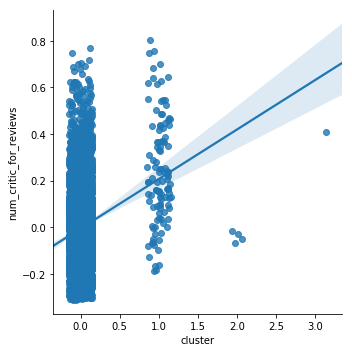

In [205]:
sns.lmplot("cluster", "num_critic_for_reviews", df_7, x_jitter=.15, y_jitter=.15)

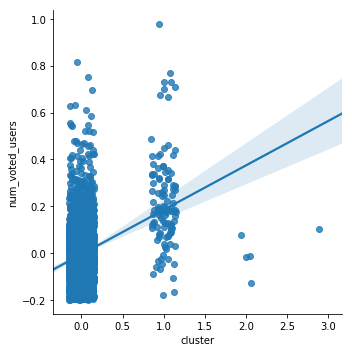

In [206]:
sns.lmplot("cluster", "num_voted_users", df_7, x_jitter=.15, y_jitter=.15)

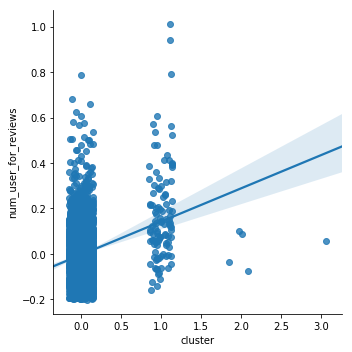

In [207]:
sns.lmplot("cluster", "num_user_for_reviews", df_7, x_jitter=.15, y_jitter=.15)

#### Our important columns appear to be Num_Critic_For_Reviews, num_user_for_reviews, Num_Voted_Users with this model.

## 9. Final Storytelling

#### Our analysis has drive us to make some conclusions about what makes a movie successful in regards to the IMDB Movie Score.  Some of them were expected, but there were also some that were surprising or at a minimum entertaining. 

**Important Variables to Determine Movie Success Based Upon IMDB_Score**

- Our most reliable model and analysis has shown that the key variables to predicting movie success are:
    - num_critic_for_reviews
    - duration
    - director_facebook_likes
    - actor_3_facebook_likes
    - actor_1_facebook_likes
    - gross 
    - num_voted_users
    - cast_total_facebook_likes
    
**As the studio prepares for a movie release our analysis shows that facebook is an important factor in getting the word out about the movie.  Special care should be taken to ensure participation on Facebook from Actors and Directors. **

**Getting people to see the movie will also help with the movie IMDB Score, as there is a strong indication that gross sales impact the score the movie will receive.**

**Additionally getting the audience to participate in voting on the IMDB website is crucial for a movie's success.  Finally it is also important to get critics to review the movie as an increase in critic reviews has a direct impact on the success of a movie.**

**An interesting finding is that the longer a movie is, the better success it has on the IMDB Website, however, we do not recommend that just by making a movie longer it will be successful.  We think this to be an anamoly and nothing more.**

- Additional data points that would assist with future analysis include:
    - Movie trailer views on popular sites like YouTube and Apple Trailers
    - Press coverage of a movie (did any of the actors/directors make the news?)
    - Twitter hype of a movie
    - Is the movie based on popular novels
    

